# (1) 라이브러리 불러오기

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!
import joblib

#한글 폰트 지정
import matplotlib.font_manager as fm

# 설치된 폰트
font_list = [font.name for font in fm.fontManager.ttflist]

# 맑은 고딕이 있는지 확인
'Malgun Gothic' in font_list

plt.rcParams['font.family'] = 'Malgun Gothic'

- colab 작업용: 경로 커스터마이징 필요(편하신 대로 사용하세요)

In [213]:

# from google.colab import drive
# drive.mount('/content/drive')

# (2) 데이터 불러오기
1. 전남 총 인구수 = '2024_전라남도_인구_추계.csv'
2. 전남 폐교 수 = '2024_전라남도교육청_폐교재산기본정보.csv'
3. 전국 학교 학생수 현황 = '2024_초등학교_전라남도.csv'

In [214]:
# import os
# print("현재 작업 디렉토리:", os.getcwd())  # 현재 작업 디렉토리 출력

In [215]:
# 로컬 경로 (다운받아 사용하신다면 수정해서 사용하세요 )
path = ''

In [216]:
file = '2024_전라남도_인구_추계.csv'
data01= pd.read_csv(path + file)
# data01.head()

In [217]:
file = '2024_전라남도교육청_폐교재산기본정보.csv'
data02= pd.read_csv(path + file)
# data02.head()

In [218]:
file = '2024_전국초등학교.csv'
data03 = pd.read_csv(path + file)
# data03.head()

In [219]:
file = '전국학원교습소정보(교육부,2024).csv'
data04 = pd.read_csv(path + file)
#data04.head()

# (3) 데이터 전처리

In [220]:
# 데이터 복사 (원본 데이터를 지키도록 )
data_total_human= data01.copy()  # 총 인구수
data_close_school = data02.copy() # 폐교 학교
data_total_school = data03.copy() # 전국 학교
data_coding_academy = data04.copy() # 전국 코딩학원

### 1) 총 인구수 전처리 (data_total_human)
- 1. xlsx > csv 파일로 변환하는 과정에서 삭제된 행 (전부 NA로 구성) 이 표기되는 문제   
- 2. 중간에 인구수가 비어있는 경우 [-1 년도]~ [+1년도] 의 합 평균으로 대체
- 3. 결측치가 있어서 float 으로 표기되는 문제 > int로 변환

In [221]:
# data_total

In [222]:
# 전라남도 총 인구수
# 1. 결측치 제거 (행이 전부 NA )
data_total_human = data_total_human.dropna(axis=0,how='all')
# data_total

In [223]:
# 2. 2015년부터 2040년까지의 결측치를 이전 년도와 이후 년도의 평균값으로 채우기
for year in range(2015, 2040):
    year_str = str(year)
    next_year_str = str(year + 1) if year + 1 <= 2040 else None
    prev_year_str = str(year - 1) if year - 1 >= 2015 else None

    for index, row in data_total_human.iterrows():
        if pd.isna(row[year_str]):  # 해당 연도의 값이 결측치일 경우
            prev_value = data_total_human.at[index, prev_year_str] if prev_year_str else None
            next_value = data_total_human.at[index, next_year_str] if next_year_str else None

            # 이전 년도와 이후 년도의 평균으로 결측치를 채움
            if prev_value is not None and next_value is not None:
                data_total_human.at[index, year_str] = (prev_value + next_value) / 2
            elif prev_value is not None:
                data_total_human.at[index, year_str] = prev_value
            elif next_value is not None:
                data_total_human.at[index, year_str] = next_value

# data_total.isna().sum()

In [224]:
cols_to_convert = [str(year) for year in range(2015, 2041)]  # 2015~2040 열 선택
data_total_human[cols_to_convert] = data_total_human[cols_to_convert].astype(int) # 정수로 변환

# data_total.head()
# 결측치 수 확인
# data_total.isna().sum()결측치 수 확인-

### 2) 폐교 데이터 전처리 (data_close_school)
1. 삭제할 컬럼들을 제거

In [225]:
#data_close_school.head()


In [226]:
# 삭제할 컬럼
drop_cols = ['시도교육청명','시도교육청코드','교육지원청코드','교육지원청명','시도코드','시도명','시군구코드','담당자 부서명','담당자 전화번호','소재지도로명주소','소재지지번주소','데이터기준일자']

data_close_school=data_close_school.drop(columns=drop_cols)

data_close_school

,시군구명,폐교명,폐교연도,학교급구분명,활용현황구분명,건물연면적,대지
0,강진군,강진서초영파분교장,1991,초등학교,미활용,0,9250
1,강진군,강진북초등학교,2024,초등학교,미활용,2346,20534
2,고흥군,과역동초백일분교장,2007,초등학교,미활용,211,5056
3,고흥군,나로고등학교,2014,고등학교,미활용,3473,21377
4,고흥군,동강초매곡분교장,1997,초등학교,미활용,1130,13278
...,...,...,...,...,...,...,...
112,화순군,아산초노치분교장,1994,초등학교,미활용,106,3309
113,화순군,동면초옥호분교장,1995,초등학교,미활용,289,3465
114,화순군,아산초송방분교장,1996,초등학교,미활용,835,7100
115,화순군,화순초수만분교장,1997,초등학교,미활용,362,5014


### 3) 전국 작은학교 데이터 전처리 (data_total_school)
1. 삭제할 컬럼 제거
2. '학급수(계)'와 '학생수(계)'에서 괄호와 숫자를 제거

In [227]:
# data_total_school

In [228]:
drop_cols = ['정보공시 학교코드','학교급코드','제외여부','제외사유']

data_total_school=data_total_school.drop(columns=drop_cols)

data_total_school

,시도교육청,교육지원청,지역,학교명,설립구분,1학년,2학년,3학년,4학년,5학년,6학년,특수학급,순회학급,학급수(계),학생수(계),학급당학생수
0,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,서울교육대학교부설초등학교,국립,4,4,4,5,5,5,1,0,28(1),611(5),21.8
1,서울특별시교육청,서울특별시중부교육지원청,서울특별시 종로구,서울대학교사범대학부설초등학교,국립,5,5,5,5,5,5,1,0,31(1),576(6),18.6
2,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,서울개원초등학교,공립,7,4,5,4,5,4,1,0,30(1),868(8),28.9
3,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,서울개일초등학교,공립,5,5,6,5,6,6,0,0,33(0),967(0),29.3
4,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,서울개포초등학교,공립,8,7,6,7,7,7,2,0,44(2),903(4),20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,월랑초등학교,공립,3,4,3,4,4,5,1,0,24(1),569(8),23.7
6298,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,이도초등학교,공립,6,6,8,7,7,9,1,0,44(1),1096(11),24.9
6299,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,도련초등학교,공립,6,7,8,8,8,8,2,0,47(2),1129(16),24.0
6300,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,삼화초등학교,공립,4,4,5,4,5,6,1,0,29(1),680(5),23.4


In [229]:
# '학급수(계)'와 '학생수(계)'에서 괄호와 숫자를 제거
data_total_school['학급수(계)'] = data_total_school['학급수(계)'].str.extract('(\d+)')  # 괄호 안 숫자 제거하고 숫자만 추출
data_total_school['학생수(계)'] = data_total_school['학생수(계)'].str.extract('(\d+)')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_12940\3530519482.py:2: SyntaxWarning: invalid escape sequence '\d'
  data_total_school['학급수(계)'] = data_total_school['학급수(계)'].str.extract('(\d+)')  # 괄호 안 숫자 제거하고 숫자만 추출
C:\Users\User\AppData\Local\Temp\ipykernel_12940\3530519482.py:3: SyntaxWarning: invalid escape sequence '\d'
  data_total_school['학생수(계)'] = data_total_school['학생수(계)'].str.extract('(\d+)')


In [230]:
data_total_school.dtypes

시도교육청      object
교육지원청      object
지역         object
학교명        object
설립구분       object
1학년         int64
2학년         int64
3학년         int64
4학년         int64
5학년         int64
6학년         int64
특수학급        int64
순회학급        int64
학급수(계)     object
학생수(계)     object
학급당학생수    float64
dtype: object

In [231]:
# 작은학교 여부(전교생 60명 이하) 컬럼 생성
# '학생수(계)'가 60명 이하인지 여부를 판단하여 '작은학교여부' 컬럼 생성
data_total_school['작은학교여부'] = data_total_school['학생수(계)'].astype(int).apply(lambda x: 1 if x <= 60 else 0)

In [232]:
# '지역' 컬럼을 '시'와 '구'로 분리하기 위해 '지역'의 첫 번째 부분을 '시'로, 두 번째 부분을 '구'로 분리
data_total_school[['지역(시)', '지역(구)']] = data_total_school['지역'].str.extract(r'([^\s]+)\s(.*)')

drop_cols = '지역'

data_total_school=data_total_school.drop(columns= drop_cols)

In [233]:
data_total_school

,시도교육청,교육지원청,학교명,설립구분,1학년,2학년,3학년,4학년,5학년,6학년,특수학급,순회학급,학급수(계),학생수(계),학급당학생수,작은학교여부,지역(시),지역(구)
0,서울특별시교육청,서울특별시강남서초교육지원청,서울교육대학교부설초등학교,국립,4,4,4,5,5,5,1,0,28,611,21.8,0,서울특별시,서초구
1,서울특별시교육청,서울특별시중부교육지원청,서울대학교사범대학부설초등학교,국립,5,5,5,5,5,5,1,0,31,576,18.6,0,서울특별시,종로구
2,서울특별시교육청,서울특별시강남서초교육지원청,서울개원초등학교,공립,7,4,5,4,5,4,1,0,30,868,28.9,0,서울특별시,강남구
3,서울특별시교육청,서울특별시강남서초교육지원청,서울개일초등학교,공립,5,5,6,5,6,6,0,0,33,967,29.3,0,서울특별시,강남구
4,서울특별시교육청,서울특별시강남서초교육지원청,서울개포초등학교,공립,8,7,6,7,7,7,2,0,44,903,20.5,0,서울특별시,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,제주특별자치도교육청,제주시교육지원청,월랑초등학교,공립,3,4,3,4,4,5,1,0,24,569,23.7,0,제주특별자치도,제주시
6298,제주특별자치도교육청,제주시교육지원청,이도초등학교,공립,6,6,8,7,7,9,1,0,44,1096,24.9,0,제주특별자치도,제주시
6299,제주특별자치도교육청,제주시교육지원청,도련초등학교,공립,6,7,8,8,8,8,2,0,47,1129,24.0,0,제주특별자치도,제주시
6300,제주특별자치도교육청,제주시교육지원청,삼화초등학교,공립,4,4,5,4,5,6,1,0,29,680,23.4,0,제주특별자치도,제주시


### 4) 전남 작은학교 데이터 전처리(data_target_school)
1. 전국 학교 현황 데이터에서 , 시도교육청 ='전라남도교육청' 인 열들만  추출

In [234]:
# '시도교육청'이 '전라남도교육청'인 행만 필터링
data_target_school = data_total_school[data_total_school['시도교육청'] == '전라남도교육청']
data_target_school

,시도교육청,교육지원청,학교명,설립구분,1학년,2학년,3학년,4학년,5학년,6학년,특수학급,순회학급,학급수(계),학생수(계),학급당학생수,작은학교여부,지역(시),지역(구)
4722,전라남도교육청,전라남도목포교육지원청,광주교육대학교목포부설초등학교,국립,3,3,3,3,3,3,1,0,19,394,20.7,0,전라남도,목포시
4723,전라남도교육청,전라남도강진교육지원청,강진동초등학교,공립,1,1,1,1,1,1,1,0,7,54,7.7,1,전라남도,강진군
4724,전라남도교육청,전라남도강진교육지원청,강진중앙초등학교,공립,5,5,6,5,4,4,1,0,30,608,20.3,0,전라남도,강진군
4725,전라남도교육청,전라남도강진교육지원청,계산초등학교,공립,1,1,1,1,1,1,1,0,7,52,7.4,1,전라남도,강진군
4726,전라남도교육청,전라남도강진교육지원청,군동초등학교,공립,1,1,1,1,1,1,1,0,7,30,4.3,1,전라남도,강진군
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5165,전라남도교육청,전라남도순천교육지원청,신대초등학교,공립,12,12,11,12,10,11,0,0,68,1849,27.2,0,전라남도,순천시
5166,전라남도교육청,전라남도나주교육지원청,빛누리초등학교,공립,10,9,12,9,9,10,2,0,61,1402,23.0,0,전라남도,나주시
5167,전라남도교육청,전라남도무안교육지원청,무안행복초등학교,공립,11,12,12,12,9,9,1,0,66,1636,24.8,0,전라남도,무안군
5168,전라남도교육청,전라남도광양교육지원청,광양와우초등학교,공립,3,3,2,2,2,2,0,0,14,303,21.6,0,전라남도,광양시


### 5) 전국 코딩학원 현황 (data_coding_academy)
1. 지역별 코딩학원 개수(= IT 교육시설) 차이를 시각화 하기 위함   [주로 서울특별시 vs 전라남도]
2. 필요없는 컬럼 삭제 (수정일자, 전화번호, 수저일자, 도로명)  : 다시 생각해보니까 전부 쓸모없는 데이터들인데 삭제하진 말고 종합 결과만 보여주자

In [235]:
data_coding_academy.head()

,시도교육청코드,시도교육청명,행정구역명,학원교습소명,학원지정번호,학원명,개설일자,등록일자,등록상태명,휴원시작일자,...,교습과정목록명,교습과정명,인당수강료,수강료공개여부,기숙사학원여부,도로명주소,도로명상세주소,도로명우편번호,전화번호,수정일자
0,B10,서울특별시교육청,강남구,학원,3000038262,더알고리즘(The Rgorithm)학원,20210118,20210118,개원,,...,"정보교과,",정보교과,,Y,N,서울특별시 강남구 압구정로 156,", 207호 (신사동, 카로시티2빌딩)",6030,02-514-3697,20231018
1,B10,서울특별시교육청,강남구,학원,3000043235,로그엔코딩학원,20230206,20230206,개원,,...,정보교과,정보교과,,Y,N,서울특별시 강남구 언주로174길 17,", 3층 일부 북동측호 (신사동)",6017,02-540-1628,20241215
2,B10,서울특별시교육청,강동구,학원,3000051438,알콤학원,20241118,20241118,개원,,...,NaN,NaN,,Y,,서울특별시 강동구 풍성로54길 56,3층 (성내동),5403,NaN,20241215
3,B10,서울특별시교육청,강북구,교습소,3000050952,코리코딩교습소,20240816,20240816,개원,,...,NaN,NaN,,Y,,서울특별시 강북구 솔샘로 167,벽산라이브파크 상가동 129-1호(미아동),1191,02-0000-0000,20240908
4,B10,서울특별시교육청,광진구,학원,3000051233,디랩코딩광진학원,20241011,20241011,개원,,...,정보,정보,,Y,,서울특별시 광진구 광나루로54길 32,4층(구의동),5117,02-0000-0000,20241215


# (4) 사용할 데이터프레임 확인

1. data_total_human : 전남 인구수 추이(2015~ 2040)
2. data_close_school: 전남 폐교 학교 정보
3. data_total_school: 전국 학교 데이터
4. data_target_school: 전국 학교 데이터 중에서 '전라남도' 데이터  
5. data_coding_academy : 전국 코딩학원 (지역별) 총합 수 확인용용

In [236]:
data_total_human.head()

,연령별(1),2015,2016,2017,2018,2019,2020,2021,2022,2023,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,계,1796578,1798310,1795036,1796331,1793043,1793108,1782951,1768620,1757262,...,1691353,1684207,1677115,1670005,1662850,1655614,1648264,1640703,1633004,1625140
1,0 - 4세,77867,75751,72465,67561,63060,58050,52933,48568,45151,...,40818,41390,41788,42009,42074,41917,41487,40834,40004,39045
2,5 - 9세,74456,76523,77976,77578,76746,76030,73677,69825,65221,...,37599,37228,37373,38202,39244,40134,40854,41397,41760,41956
3,10 - 14세,87395,80634,77662,76835,75156,76335,78074,78777,78122,...,50991,46919,43649,40820,38737,37795,37462,37686,38620,39766
4,15 - 19세,111225,108852,102937,97192,91205,84097,80653,78695,77682,...,72916,69098,64782,60692,55878,50718,46746,43530,40754,38751


In [237]:
data_close_school.head()

,시군구명,폐교명,폐교연도,학교급구분명,활용현황구분명,건물연면적,대지
0,강진군,강진서초영파분교장,1991,초등학교,미활용,0,9250
1,강진군,강진북초등학교,2024,초등학교,미활용,2346,20534
2,고흥군,과역동초백일분교장,2007,초등학교,미활용,211,5056
3,고흥군,나로고등학교,2014,고등학교,미활용,3473,21377
4,고흥군,동강초매곡분교장,1997,초등학교,미활용,1130,13278


In [238]:
data_total_school.head()

,시도교육청,교육지원청,학교명,설립구분,1학년,2학년,3학년,4학년,5학년,6학년,특수학급,순회학급,학급수(계),학생수(계),학급당학생수,작은학교여부,지역(시),지역(구)
0,서울특별시교육청,서울특별시강남서초교육지원청,서울교육대학교부설초등학교,국립,4,4,4,5,5,5,1,0,28,611,21.8,0,서울특별시,서초구
1,서울특별시교육청,서울특별시중부교육지원청,서울대학교사범대학부설초등학교,국립,5,5,5,5,5,5,1,0,31,576,18.6,0,서울특별시,종로구
2,서울특별시교육청,서울특별시강남서초교육지원청,서울개원초등학교,공립,7,4,5,4,5,4,1,0,30,868,28.9,0,서울특별시,강남구
3,서울특별시교육청,서울특별시강남서초교육지원청,서울개일초등학교,공립,5,5,6,5,6,6,0,0,33,967,29.3,0,서울특별시,강남구
4,서울특별시교육청,서울특별시강남서초교육지원청,서울개포초등학교,공립,8,7,6,7,7,7,2,0,44,903,20.5,0,서울특별시,강남구


In [239]:
data_target_school.head()

,시도교육청,교육지원청,학교명,설립구분,1학년,2학년,3학년,4학년,5학년,6학년,특수학급,순회학급,학급수(계),학생수(계),학급당학생수,작은학교여부,지역(시),지역(구)
4722,전라남도교육청,전라남도목포교육지원청,광주교육대학교목포부설초등학교,국립,3,3,3,3,3,3,1,0,19,394,20.7,0,전라남도,목포시
4723,전라남도교육청,전라남도강진교육지원청,강진동초등학교,공립,1,1,1,1,1,1,1,0,7,54,7.7,1,전라남도,강진군
4724,전라남도교육청,전라남도강진교육지원청,강진중앙초등학교,공립,5,5,6,5,4,4,1,0,30,608,20.3,0,전라남도,강진군
4725,전라남도교육청,전라남도강진교육지원청,계산초등학교,공립,1,1,1,1,1,1,1,0,7,52,7.4,1,전라남도,강진군
4726,전라남도교육청,전라남도강진교육지원청,군동초등학교,공립,1,1,1,1,1,1,1,0,7,30,4.3,1,전라남도,강진군


# (5) 데이터 시각화 (단변량 분석)
1. data_total_human : 전남 인구수 추이(2015~ 2040)
2. data_close_school: 전남 폐교 학교 정보
3. data_total_school: 전국 학교 데이터
4. data_target_school: 전국 학교 데이터 중에서 '전라남도' 데이터
5. data_coding_academy: 전국 코딩학원 현황


- 1) data_total_human : 전남 인구수 추이(나이대별 분석  - 주 타겟: 10~14세)

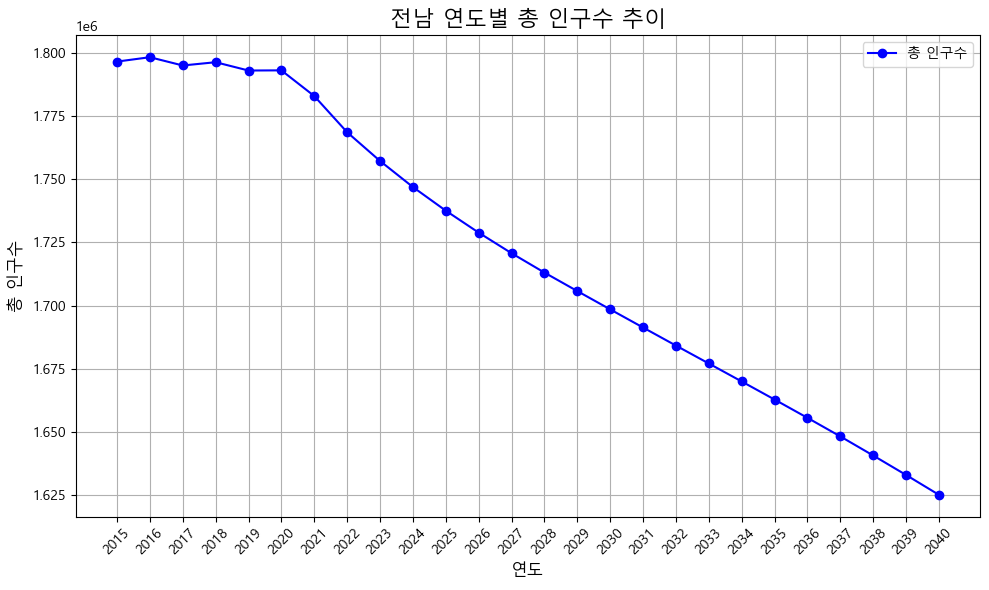

In [240]:
# 전남 인구수 추이

# 연도별 총 인구수 추이 (계)만 추출
total_population = data_total_human.loc[data_total_human['연령별(1)'] == '계'].drop('연령별(1)', axis=1).values.flatten()
# 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(data_total_human.columns[1:], total_population, marker='o', color='b', label='총 인구수')
plt.title('전남 연도별 총 인구수 추이', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('총 인구수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


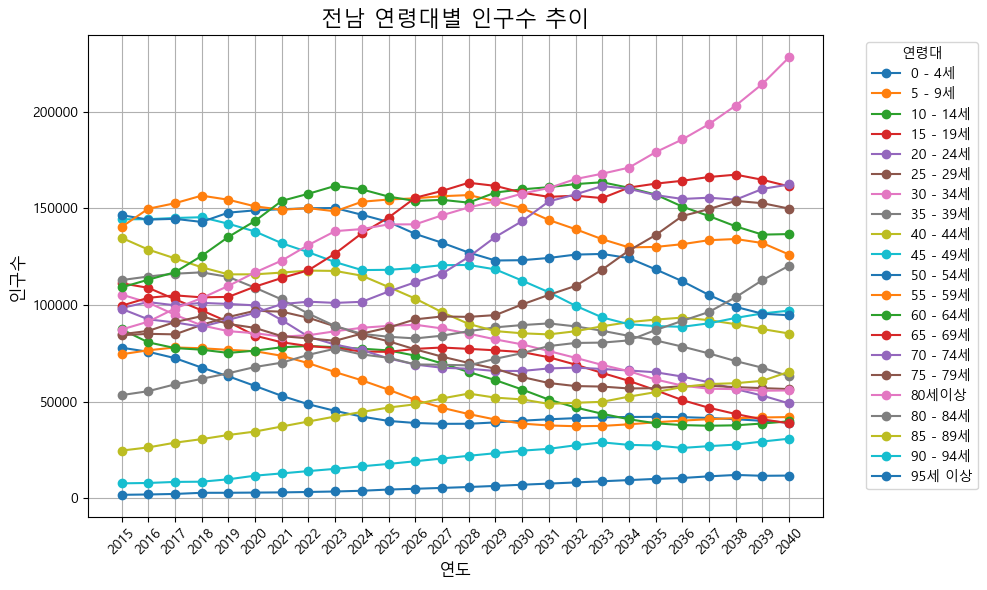

In [241]:
# 연령별 인구수 데이터만 추출
age_groups = data_total_human['연령별(1)'][1:]  # '계'를 제외한 연령대
age_population = data_total_human.drop('연령별(1)', axis=1).iloc[1:]  # 연령대별 인구수

# 각 연령대의 인구수 추이 그래프 그리기
plt.figure(figsize=(10, 6))

for i, age_group in enumerate(age_groups):
    plt.plot(data_total_human.columns[1:], age_population.iloc[i], marker='o', label=age_group)

plt.title('전남 연령대별 인구수 추이', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('인구수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="연령대", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- 모든 연령대 중에서 10~14 대상 분포만 확인

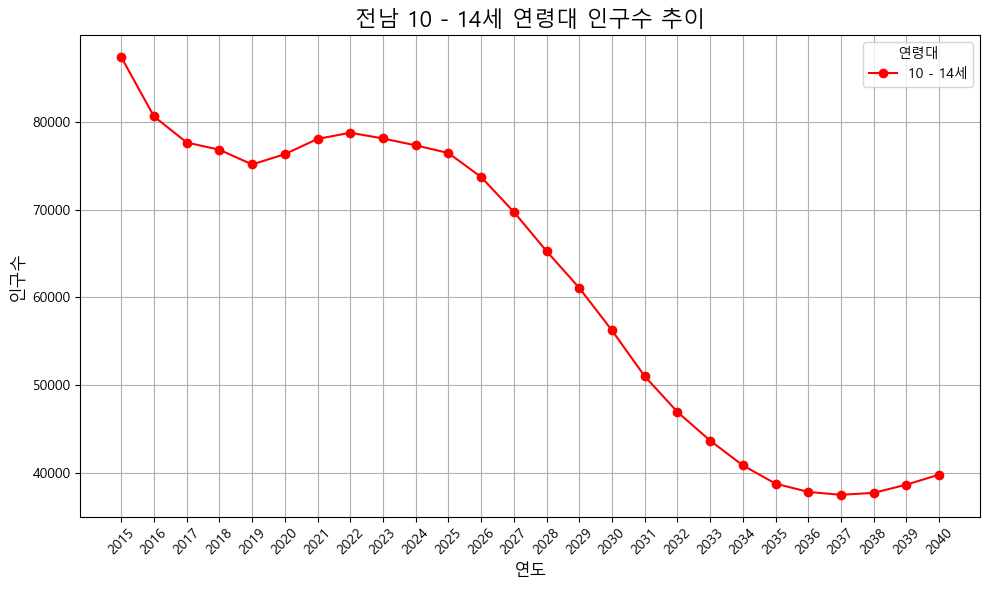

In [242]:
# 10 - 14세 연령대 추출
age_group_10_14 = data_total_human.loc[data_total_human['연령별(1)'] == '10 - 14세'].drop('연령별(1)', axis=1).values.flatten()
# 20 - 24세 연령대 추출
#age_group_20_24 = data_total_human.loc[data_total_human['연령별(1)'] == '20 - 24세'].drop('연령별(1)', axis=1).values.flatten()
# 65 - 69세세 연령대 추출
#age_group_65_69 = data_total_human.loc[data_total_human['연령별(1)'] == '65 - 69세'].drop('연령별(1)', axis=1).values.flatten()
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.title('전남 10 - 14세 연령대 인구수 추이', fontsize=16)
plt.plot(data_total_human.columns[1:], age_group_10_14, marker='o', color='r', label='10 - 14세')
#plt.plot(data_total_human.columns[1:], age_group_20_24, marker='o', color='g', label='20 - 24세')
#plt.plot(data_total_human.columns[1:], age_group_65_69, marker='o', color='b', label='65 - 69세')

plt.xlabel('연도', fontsize=12)
plt.ylabel('인구수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="연령대")
plt.tight_layout()
plt.show()

- 주요 타겟은 10~14 학생들   , 20, 60대도 출력 가능한데 주석처리함

- 2.  data_close_school: 전남 폐교 학교 정보  (지역별)

In [243]:
data_close_school

,시군구명,폐교명,폐교연도,학교급구분명,활용현황구분명,건물연면적,대지
0,강진군,강진서초영파분교장,1991,초등학교,미활용,0,9250
1,강진군,강진북초등학교,2024,초등학교,미활용,2346,20534
2,고흥군,과역동초백일분교장,2007,초등학교,미활용,211,5056
3,고흥군,나로고등학교,2014,고등학교,미활용,3473,21377
4,고흥군,동강초매곡분교장,1997,초등학교,미활용,1130,13278
...,...,...,...,...,...,...,...
112,화순군,아산초노치분교장,1994,초등학교,미활용,106,3309
113,화순군,동면초옥호분교장,1995,초등학교,미활용,289,3465
114,화순군,아산초송방분교장,1996,초등학교,미활용,835,7100
115,화순군,화순초수만분교장,1997,초등학교,미활용,362,5014


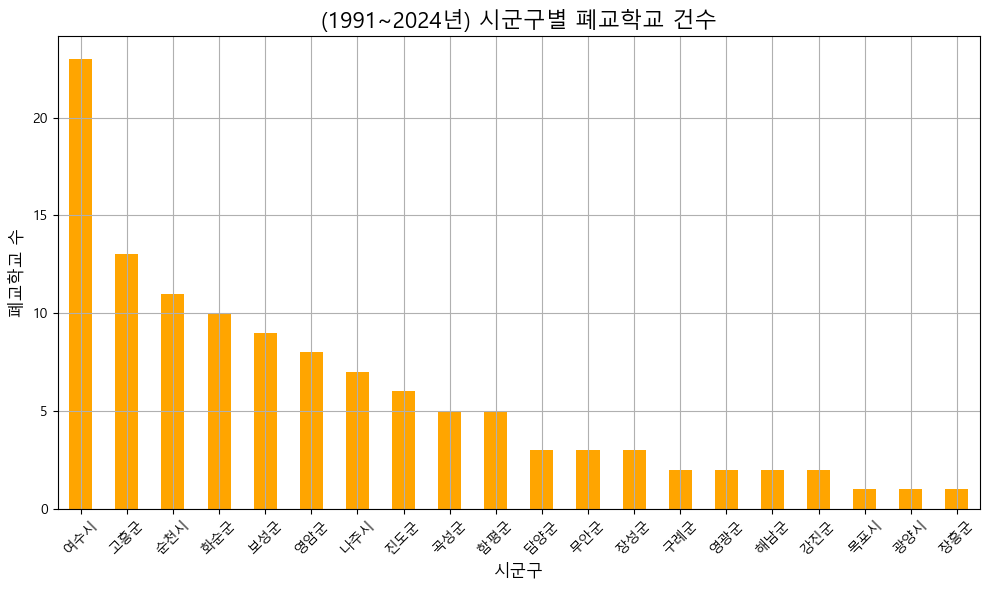

In [244]:
# 시군구별 폐교학교 수 계산
close_school_count = data_close_school['시군구명'].value_counts()

# 그래프 그리기
plt.figure(figsize=(10, 6))
close_school_count.plot(kind='bar', color='orange')

plt.title('(1991~2024년) 시군구별 폐교학교 건수', fontsize=16)
plt.xlabel('시군구', fontsize=12)
plt.ylabel('폐교학교 수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

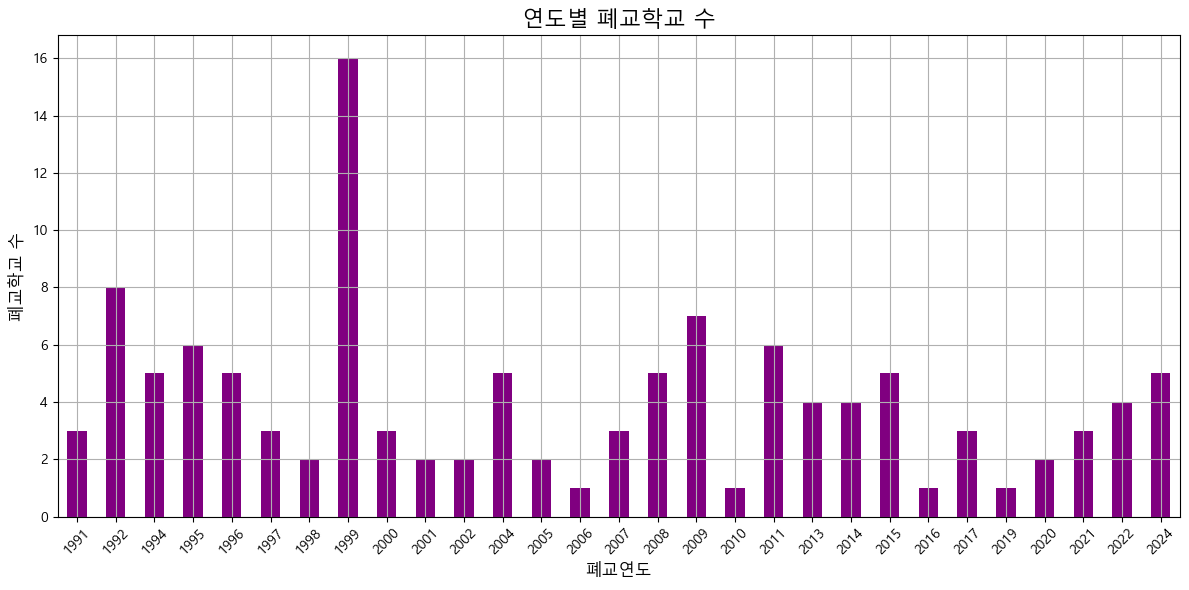

In [245]:
# 폐교연도별로 그룹화하여 폐교학교 수 계산
close_school_by_year = data_close_school.groupby('폐교연도')['폐교명'].count()

# 결과 시각화
plt.figure(figsize=(12, 6))
close_school_by_year.plot(kind='bar', color='purple')

plt.title('연도별 폐교학교 수', fontsize=16)
plt.xlabel('폐교연도', fontsize=12)
plt.ylabel('폐교학교 수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

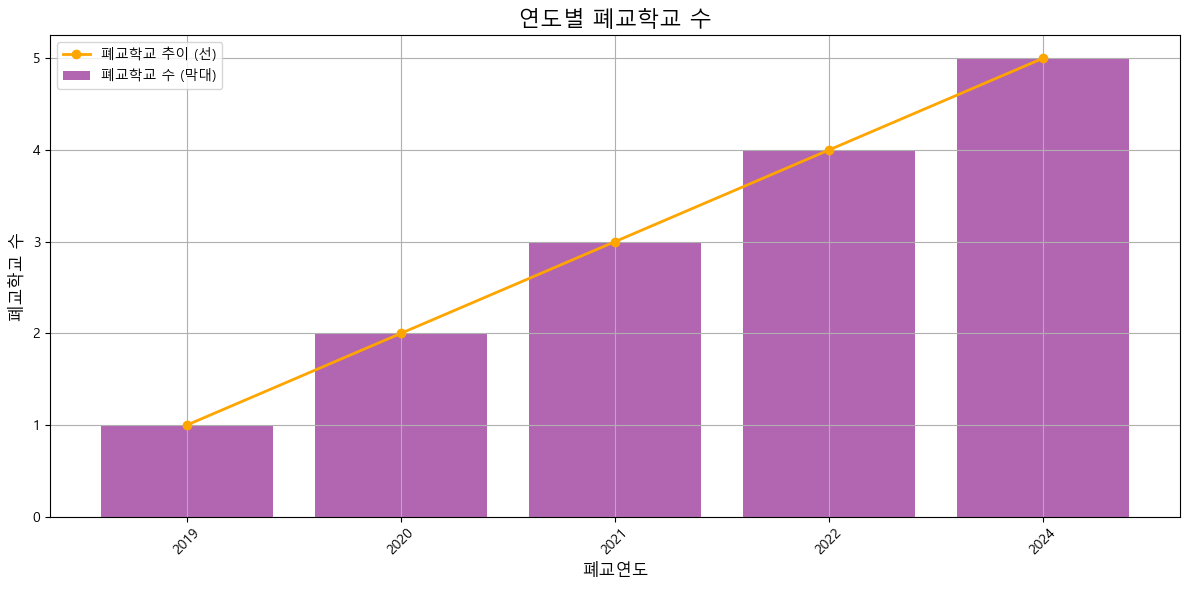

In [246]:
# 1) 폐교연도별로 그룹화하여 폐교학교 수 계산
close_school_by_year_last4 = data_close_school.groupby('폐교연도')['폐교명'].count()

# 2) 2019~2024 데이터 중 2023만 제거
close_school_by_year_last4_filtered = (
    close_school_by_year_last4.loc[2019:2024]
                               .drop(2023, errors='ignore')
)

# 3) x축에 사용할 인덱스(연도)와 값 준비
x_labels = close_school_by_year_last4_filtered.index      # [2019, 2020, 2021, 2022, 2024]
y_values = close_school_by_year_last4_filtered.values     # 각 연도별 폐교 수

# 4) x축 위치를 0부터 시작하는 연속된 정수 범위로 설정
x_positions = range(len(x_labels))   # [0, 1, 2, 3, 4] 등

# 5) 시각화
plt.figure(figsize=(12, 6))

# 막대 그래프: x_positions에 대해 그리되, 레이블만 x_labels로
plt.bar(
    x_positions,
    y_values,
    color='purple',
    label='폐교학교 수 (막대)',
    alpha=0.6
)

# 꺾은선 그래프
plt.plot(
    x_positions,
    y_values,
    color='orange',
    marker='o',
    label='폐교학교 추이 (선)',
    linestyle='-',
    linewidth=2
)

plt.title('연도별 폐교학교 수', fontsize=16)
plt.xlabel('폐교연도', fontsize=12)
plt.ylabel('폐교학교 수', fontsize=12)

# xticks를 실제 연도 레이블로 지정
plt.xticks(x_positions, x_labels, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [247]:
close_school_by_year_last4_filtered

폐교연도
2019    1
2020    2
2021    3
2022    4
2024    5
Name: 폐교명, dtype: int64

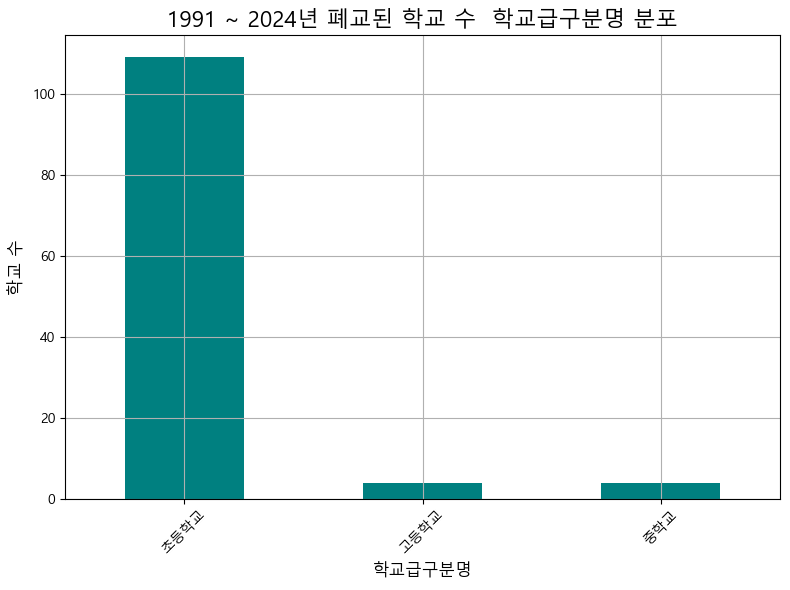

In [248]:
# 학교급구분명별로 분포를 계산
school_level_distribution = data_close_school['학교급구분명'].value_counts()

# 그래프 그리기
plt.figure(figsize=(8, 6))
school_level_distribution.plot(kind='bar', color='teal')

plt.title('1991 ~ 2024년 폐교된 학교 수  학교급구분명 분포', fontsize=16)
plt.xlabel('학교급구분명', fontsize=12)
plt.ylabel('학교 수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- 현재 초등학교 폐교 문제가 심함   
- 전남지역 초등학생 공급이 줄어들면 중학교, 고등학교도 많이 폐교할 것

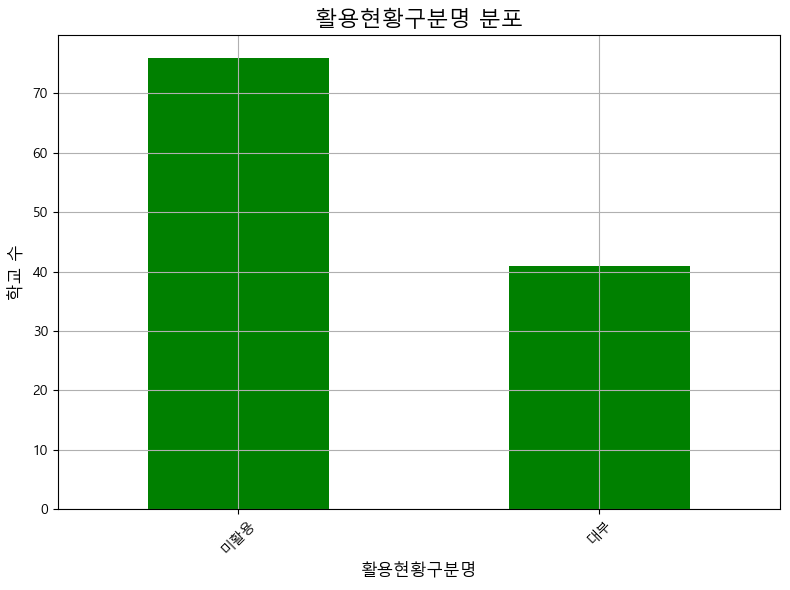

In [249]:
# 활용현황구분명별로 분포를 계산
utilization_status_distribution = data_close_school['활용현황구분명'].value_counts()

# 그래프 그리기
plt.figure(figsize=(8, 6))
utilization_status_distribution.plot(kind='bar', color='green')

plt.title('활용현황구분명 분포', fontsize=16)
plt.xlabel('활용현황구분명', fontsize=12)
plt.ylabel('학교 수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

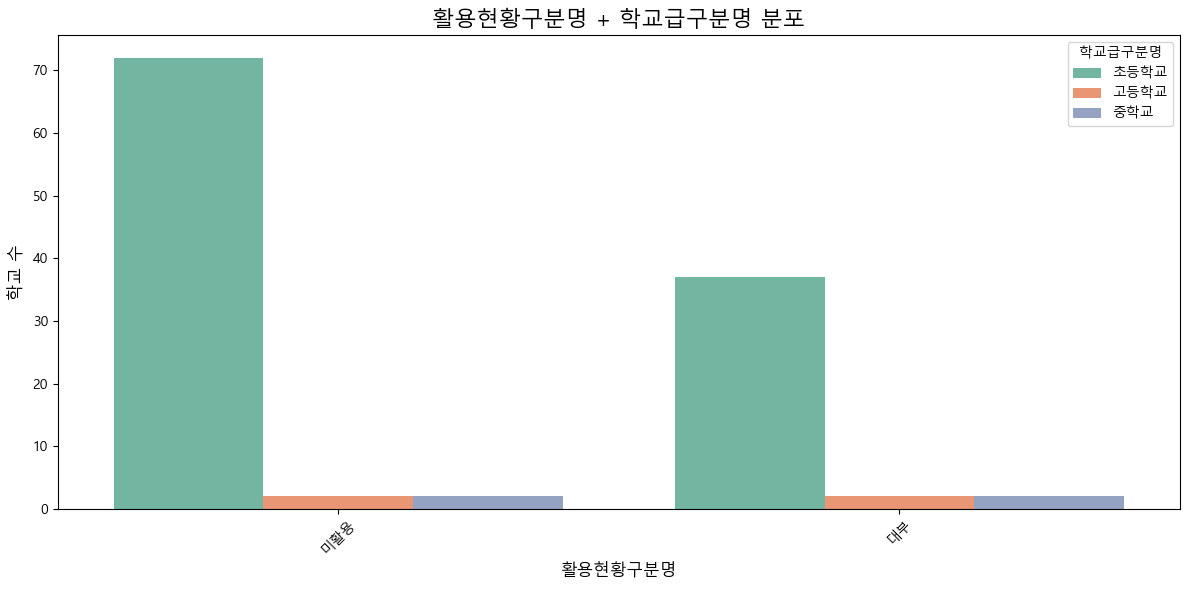

In [250]:

# # '활용현황구분명'과 '학교급구분명'의 조합으로 분포 계산
# utilization_school_level_distribution = data_close_school.groupby(['활용현황구분명', '학교급구분명']).size()

# # 결과를 DataFrame으로 변환
# utilization_school_level_distribution_df = utilization_school_level_distribution.reset_index(name='학교 수')

# # 피벗 테이블로 변환하여 막대그래프에 적합한 형태로 변경
# utilization_school_level_pivot = utilization_school_level_distribution_df.pivot(index='활용현황구분명', columns='학교급구분명', values='학교 수')

# # 그래프 그리기
# utilization_school_level_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

# plt.title('활용현황구분명 + 학교급구분명 분포', fontsize=16)
# plt.xlabel('활용현황구분명', fontsize=12)
# plt.ylabel('학교 수', fontsize=12)
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# seaborn을 사용하여 '활용현황구분명'과 '학교급구분명'의 조합에 대한 분포를 시각화
plt.figure(figsize=(12, 6))
sns.countplot(data=data_close_school, x='활용현황구분명', hue='학교급구분명', palette='Set2')

plt.title('활용현황구분명 + 학교급구분명 분포', fontsize=16)
plt.xlabel('활용현황구분명', fontsize=12)
plt.ylabel('학교 수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12940\1228291315.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='시군구명', y='건물연면적', data=data_close_school_df.groupby('시군구명', as_index=False).sum(), palette='Set2')


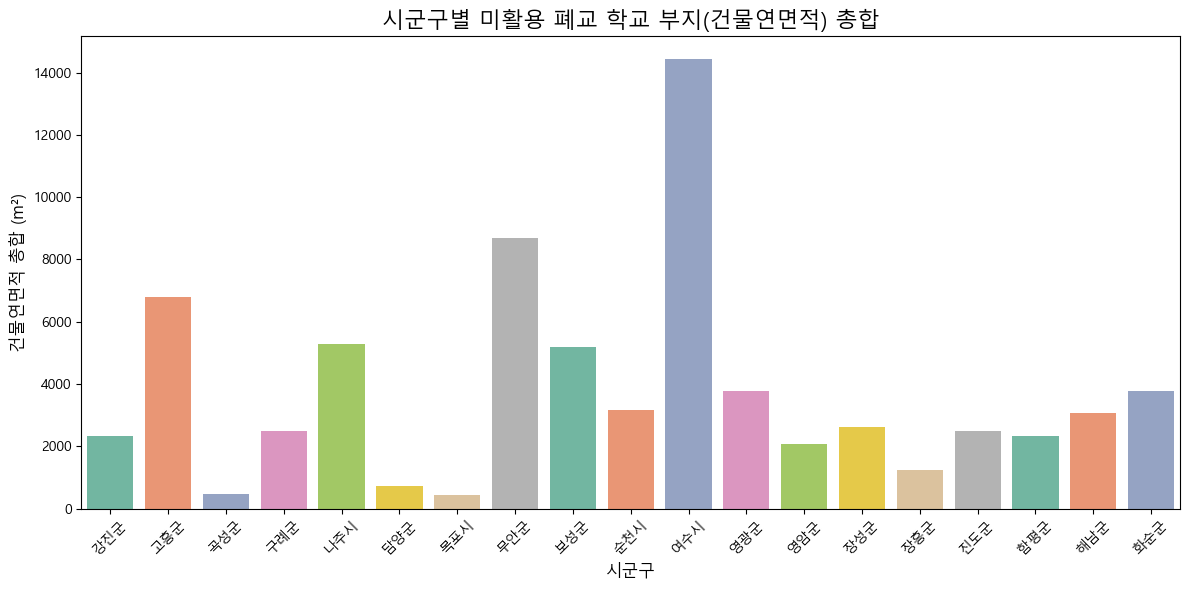

In [251]:
data_close_school_df = data_close_school[data_close_school['활용현황구분명']=='미활용']

# seaborn을 사용하여 시군구별 건물연면적의 총합을 시각화
plt.figure(figsize=(12, 6))

# '시군구명'별로 '건물연면적'의 총합을 계산한 후, 시각화
sns.barplot(x='시군구명', y='건물연면적', data=data_close_school_df.groupby('시군구명', as_index=False).sum(), palette='Set2')

plt.title('시군구별 미활용 폐교 학교 부지(건물연면적) 총합', fontsize=16)
plt.xlabel('시군구', fontsize=12)
plt.ylabel('건물연면적 총합 (m²)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

- 여수에 안쓰는 폐교 건물 부지가 가장 많다.

- (추가제안: 버스 방문시)만약 부스를 만들 지역으로로 써먹을 수 있지 않을까??

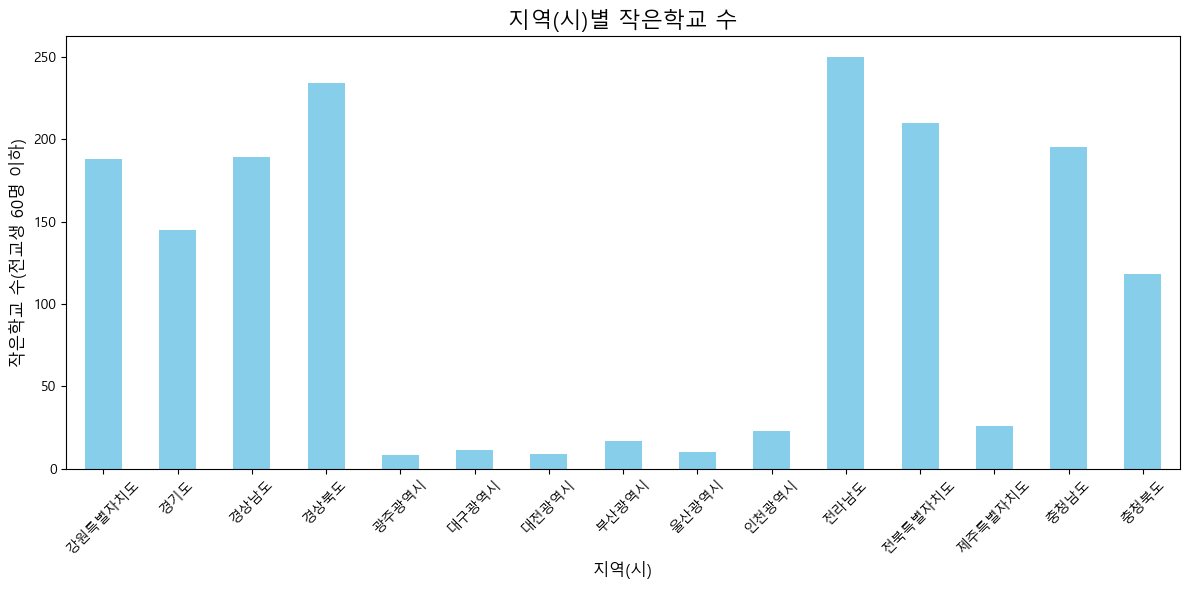

In [252]:
# 지역(시) 작은학교의 수 계산
small_school_count_by_region = data_total_school[data_total_school['작은학교여부'] == 1].groupby('지역(시)').size()

# 지역별 작은학교 수 시각화
plt.figure(figsize=(12, 6))
small_school_count_by_region.plot(kind='bar', color='skyblue')

plt.title('지역(시)별 작은학교 수', fontsize=16)
plt.xlabel('지역(시)', fontsize=12)
plt.ylabel('작은학교 수(전교생 60명 이하)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

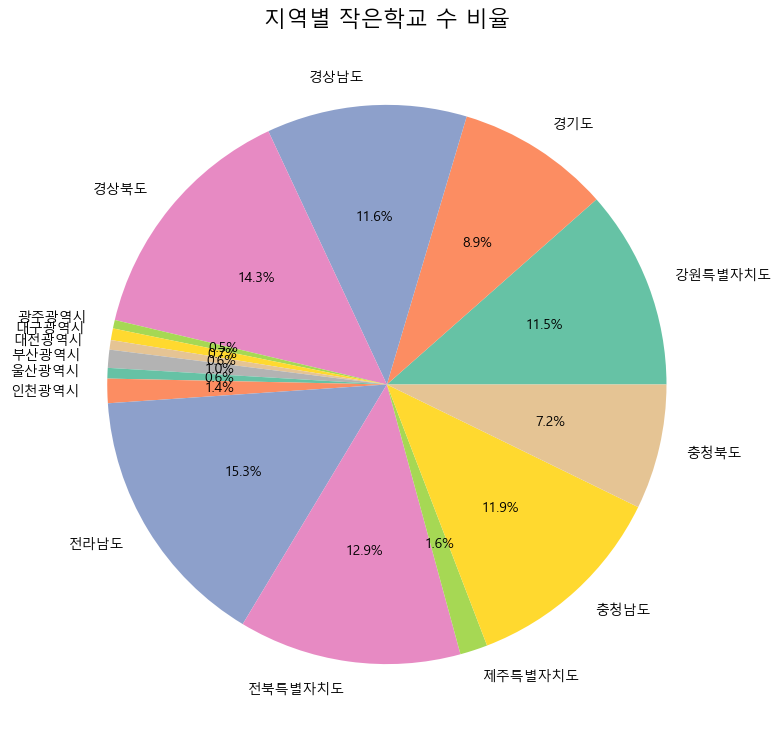

In [253]:
# '학생수(계)'가 60명 이하인 작은학교만 필터링하여 지역별로 카운트
small_school_count_by_region = data_total_school[data_total_school['작은학교여부'] == 1].groupby('지역(시)').size()

# 파이차트 시각화
plt.figure(figsize=(8, 8))

# 작은학교 수에 대한 파이차트
small_school_count_by_region.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2', len(small_school_count_by_region)), legend=False)

plt.title('지역별 작은학교 수 비율', fontsize=16)

plt.tight_layout()
plt.show()

- 타겟 선정: 전라남도 (작은학교가 제일 많음)

C:\Users\User\AppData\Local\Temp\ipykernel_12940\2588583743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_total_school, x='설립구분', palette='Set2')


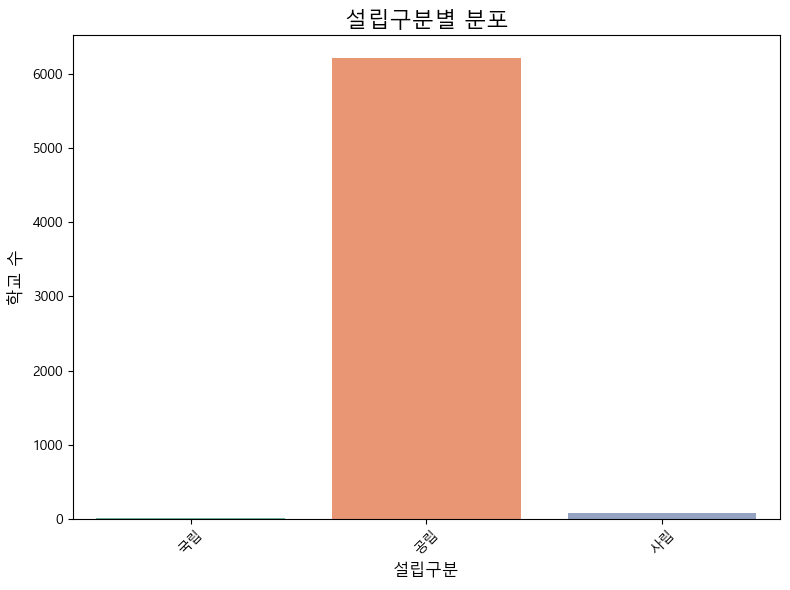

In [254]:
# '설립구분'별 분포 시각화 (막대 그래프)
plt.figure(figsize=(8, 6))

# '설립구분'에 대한 막대그래프
sns.countplot(data=data_total_school, x='설립구분', palette='Set2')

plt.title('설립구분별 분포', fontsize=16)
plt.xlabel('설립구분', fontsize=12)
plt.ylabel('학교 수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 분석 결과: 공립 학교가 대부분을 차지

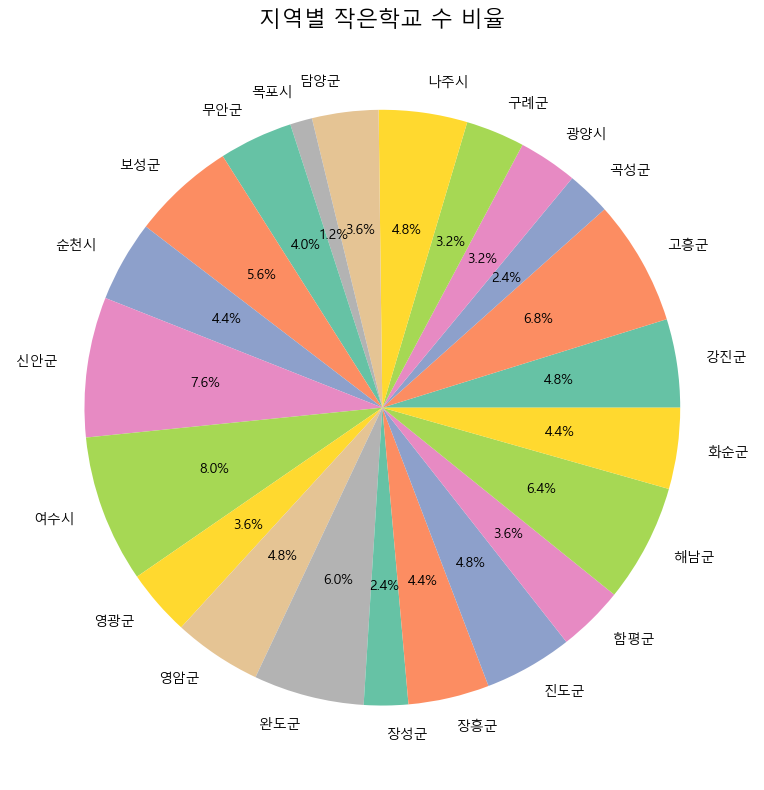

In [256]:
# '학생수(계)'가 60명 이하인 작은학교만 필터링하여 지역별로 카운트
small_school_count_by_region = data_target_school[data_target_school['작은학교여부'] == 1].groupby('지역(구)').size()

# 파이차트 시각화
plt.figure(figsize=(8, 8))

# 작은학교 수에 대한 파이차트
small_school_count_by_region.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2', len(small_school_count_by_region)), legend=False)

plt.title('지역별 작은학교 수 비율', fontsize=16)

plt.tight_layout()
plt.show()

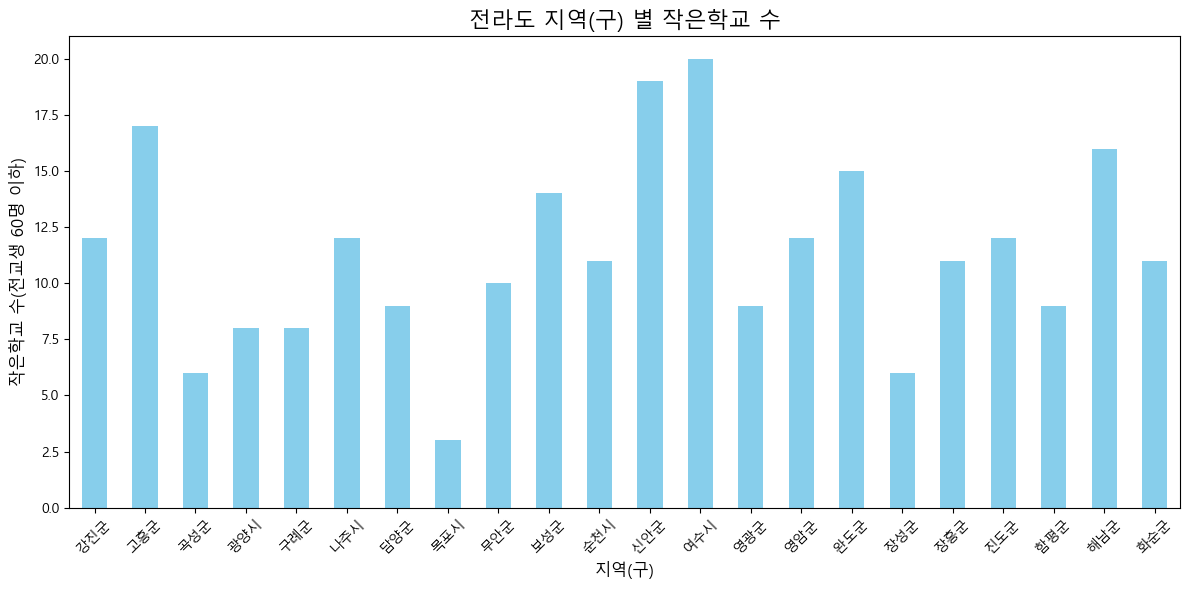

In [257]:
# 지역(시) 작은학교의 수 계산
small_school_count_by_region = data_target_school[data_target_school['작은학교여부'] == 1].groupby('지역(구)').size()

# 지역별 작은학교 수 시각화
plt.figure(figsize=(12, 6))
small_school_count_by_region.plot(kind='bar', color='skyblue')

plt.title('전라도 지역(구) 별 작은학교 수', fontsize=16)
plt.xlabel('지역(구)', fontsize=12)
plt.ylabel('작은학교 수(전교생 60명 이하)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 특히 여수시는 제일 심각함 : 폐교된 학교도 많고 , 부지도 많이 비어있고 , 앞으로 없어질 가능성이 높음(작은학교 수가 가장 많음 )

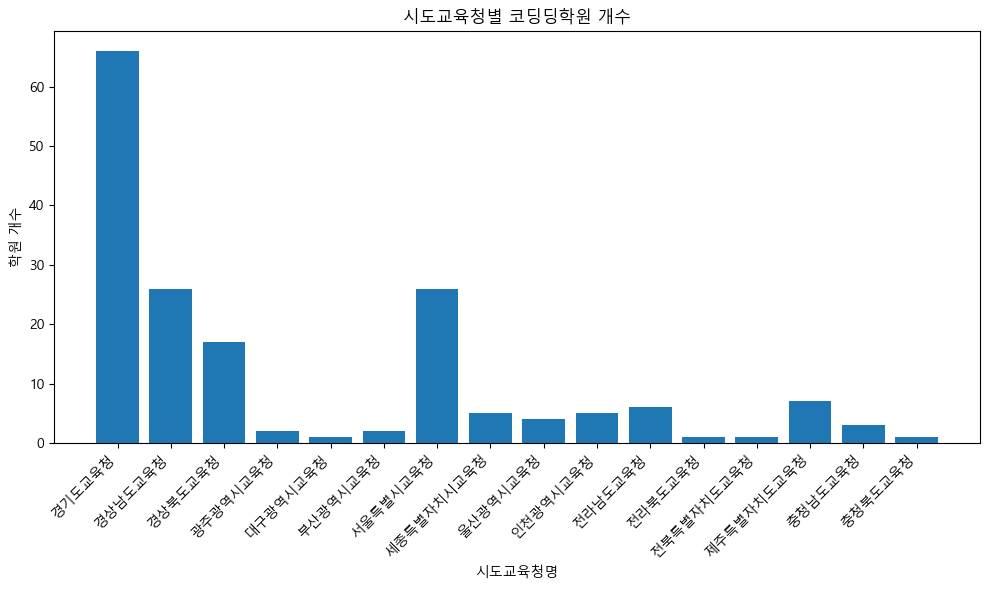

In [258]:
# 전국 코딩교육 격차
# 시도교육청명별 학원 개수 계산  ()
edu_counts = data_coding_academy.groupby('시도교육청명')['학원명'].count().reset_index(name='학원 수')

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(edu_counts['시도교육청명'], edu_counts['학원 수'])
plt.xlabel('시도교육청명')
plt.ylabel('학원 개수')
plt.title('시도교육청별 코딩딩학원 개수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [259]:
# PowerBI용 데이터프레임 csv 저장

data_total_human.to_csv('data_total_human.csv', index=False)
data_close_school.to_csv('data_close_school.csv', index=False)
data_total_school.to_csv('data_total_school.csv', index=False)
data_target_school.to_csv('data_target_school.csv', index=False)

In [260]:
# 새로운 파일을 로드하여 변환 작업을 진행합니다.


# '계' 항목 제외한 연령대만 선택
data_filtered = data_total_human[data_total_human['연령별(1)'] != '계']

# 연도별 데이터를 세로 형식으로 변환 (Unpivot)
data_unpivot = data_filtered.melt(id_vars=["연령별(1)"],
                                  value_vars=data_total_human.columns[1:],
                                  var_name="연도",
                                  value_name="인구수")


# 변환된 데이터 출력
data_unpivot.to_csv('data_total_human_v2.csv')

# (6) 다변량 분석

-  x(독립변수): 수집한 데이터들(전남 지역별, 연도별 인구,토지,교육,사업체수 등의 빅데이터 데이터프레임)
-  y(종속변수): 폐교수 , 작은학교 수




## 1) 데이터셋에서 타겟(종속변수) 가져오기

- 1. 전처리된 데이터프레임들에서 연도별(2018~2023) 폐교수 , 작은학교 수
- 2. 전처리된 데이터프레임들에서 지역별(여수시...목포군) 폐교수 , 작은학교 수

In [261]:
# data_total_human.head() # << 작은학교 정보 , 폐교 정보가 없음
#data_close_school.head() # 폐교 학교 수를 가져올 수 있음 그런데 2023년도 폐교 정보가 없음 , 2018~ 2023년도 폐교 학교
#data_total_school.head() # 전국 단위 데이터는 필요 없음 < 전남 지역만 확인하면 됨됨
data_target_school.head() # 전남 지역별 작은학교 수를 알 수 있음
#data_coding_academy.head()

,시도교육청,교육지원청,학교명,설립구분,1학년,2학년,3학년,4학년,5학년,6학년,특수학급,순회학급,학급수(계),학생수(계),학급당학생수,작은학교여부,지역(시),지역(구)
4722,전라남도교육청,전라남도목포교육지원청,광주교육대학교목포부설초등학교,국립,3,3,3,3,3,3,1,0,19,394,20.7,0,전라남도,목포시
4723,전라남도교육청,전라남도강진교육지원청,강진동초등학교,공립,1,1,1,1,1,1,1,0,7,54,7.7,1,전라남도,강진군
4724,전라남도교육청,전라남도강진교육지원청,강진중앙초등학교,공립,5,5,6,5,4,4,1,0,30,608,20.3,0,전라남도,강진군
4725,전라남도교육청,전라남도강진교육지원청,계산초등학교,공립,1,1,1,1,1,1,1,0,7,52,7.4,1,전라남도,강진군
4726,전라남도교육청,전라남도강진교육지원청,군동초등학교,공립,1,1,1,1,1,1,1,0,7,30,4.3,1,전라남도,강진군


### 1) 지역별

#### 1) 지역별 폐교 학교 수
- 지역별로 보려고 했으나 2023년도에는 폐교학교 수가 없음 (결측치인지 or 진짜 없는건지    >> 결측치 처리를 어떻게 할지 의논해봐야 함 )

In [262]:
# 폐교연도가 2023인 데이터만 필터링  < 없음
df_filtered = data_close_school[data_close_school['폐교연도'] == 2023]

# 시군구명별로 폐교 개수를 세기
df_count = df_filtered.groupby('시군구명').size().reset_index(name='폐교학교 수')

df_count

,시군구명,폐교학교 수


#### 2) 지역별 작은학교 수

In [263]:
# 지역(구)별로 작은학교여부를 count
df_count_samll_school = data_target_school.groupby('지역(구)')['작은학교여부'].sum().reset_index(name='작은학교 수')

# 컬럼 명 변경
df_count_samll_school.rename(columns={'지역(구)': '지역'}, inplace=True)

df_count_samll_school

,지역,작은학교 수
0,강진군,12
1,고흥군,17
2,곡성군,6
3,광양시,8
4,구례군,8
5,나주시,12
6,담양군,9
7,목포시,3
8,무안군,10
9,보성군,14


### 2) 연도별

#### 1) 연도별 폐교 학교 수

In [264]:

# 폐교연도가 2018년부터 2023년까지인 데이터만 필터링하여 개수 합산
df_filtered_years = data_close_school[data_close_school['폐교연도'].between(2018, 2023)]

# 폐교연도별로 개수 계산
df_year_count = df_filtered_years.groupby('폐교연도').size().reset_index(name='폐교학교 수')

# 컬럼 명 변경경
df_year_count.rename(columns={'폐교연도': '연도'}, inplace=True)

df_year_count


,연도,폐교학교 수
0,2019,1
1,2020,2
2,2021,3
3,2022,4


#### 2) 연도별 작은학교 수   
- 알 수 없음, 수집한 데이터는 2023년 기준 작은 학교 여부만 알 수 있다

## 2) 전남시 통계자료들 가져오기
- 2018~2023 년도  연도별 통계 총합 : corr_data_year
- 2023년 전남시 지역별 통계 총합 : corr_data_area
- (추가제안)사업체 대분류별 ?? << 우리 목표랑 맞지는 않지만 일단 보자  : addition_category

In [265]:
# 데이터프레임 불러오기

# 연도별
corr_data_year = pd.read_csv('correlation_analysis/전라남도_연도별_총합(02030514).csv')
# 지역별
corr_data_area = pd.read_csv('correlation_analysis/전라남도_지역별_종합(02030514).csv')
# (추가) 사업체 대분류별 ?? << 우리 목표랑 맞지는 않지만

addition_category = pd.read_csv('correlation_analysis/05. 사업체(2024)_대분류별.csv')

In [266]:
corr_data_year.head()
#corr_data_area.head()
#addition_category.head()

,연도,토지면적(km),전남지역 구성비(%),행정구역 수(시+군),행정구역 수(시),행정구역 수(군),행정구역 수 (읍+면+동),행정구역 수 (읍),행정구역 수 (면),행정구역(동)행정 수,...,종합(평생직업 교육학원 학원수),합계(평생직업 교육학원 학원수),입시검정및보습(학교교과 교습학원 학원수),국제화(학교교과 교습학원 학원수),예능(학교교과 교습학원 학원수),특수교육(학교교과 교습학원 학원수),종합(학교교과 교습학원 학원수),정보(학교교과 교습학원 학원수),기타(학교교과 교습학원 학원수),합계(학교교과 교습학원 학원수)
0,2018,12344,100,22,5,17,297,33,196,68,...,9,202,1281,314,671,0,144,0,91,2501
1,2019,12345,100,22,5,17,297,33,196,68,...,14,219,1403,331,726,0,150,0,100,2710
2,2020,12348,100,22,5,17,297,33,196,68,...,12,205,1305,287,670,0,133,0,77,2472
3,2021,12359,100,22,5,17,297,33,196,68,...,15,220,1353,301,686,0,124,0,65,2532
4,2022,12361,100,22,5,17,297,33,196,68,...,17,219,1375,291,678,0,115,3,63,2525


In [267]:
# 데이터프레임 병합

merged_corr_data_year = pd.merge(corr_data_year, df_year_count, on="연도", how="inner")

merged_corr_data_area = pd.merge(corr_data_area, df_count_samll_school, on="지역", how="inner")

# # (전처리) '-' 전부 0으로 대체
merged_corr_data_year=merged_corr_data_year.replace(' - ', 0)
merged_corr_data_year=merged_corr_data_year.replace('-', 0)
merged_corr_data_area=merged_corr_data_area.replace(' - ', 0)
merged_corr_data_area=merged_corr_data_area.replace('-', 0)

C:\Users\User\AppData\Local\Temp\ipykernel_12940\3554336909.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_corr_data_area=merged_corr_data_area.replace('-', 0)


In [268]:
merged_corr_data_year.head()
#merged_corr_data_area.head()

,연도,토지면적(km),전남지역 구성비(%),행정구역 수(시+군),행정구역 수(시),행정구역 수(군),행정구역 수 (읍+면+동),행정구역 수 (읍),행정구역 수 (면),행정구역(동)행정 수,...,합계(평생직업 교육학원 학원수),입시검정및보습(학교교과 교습학원 학원수),국제화(학교교과 교습학원 학원수),예능(학교교과 교습학원 학원수),특수교육(학교교과 교습학원 학원수),종합(학교교과 교습학원 학원수),정보(학교교과 교습학원 학원수),기타(학교교과 교습학원 학원수),합계(학교교과 교습학원 학원수),폐교학교 수
0,2019,12345,100,22,5,17,297,33,196,68,...,219,1403,331,726,0,150,0,100,2710,1
1,2020,12348,100,22,5,17,297,33,196,68,...,205,1305,287,670,0,133,0,77,2472,2
2,2021,12359,100,22,5,17,297,33,196,68,...,220,1353,301,686,0,124,0,65,2532,3
3,2022,12361,100,22,5,17,297,33,196,68,...,219,1375,291,678,0,115,3,63,2525,4


In [269]:
# 모든 데이터 정수형으로 변경해줘야 할듯
#merged_corr_data_area.dtypes

# '지역' 컬럼을 제외한 모든 컬럼을 int64로 변환
merged_corr_data_area = merged_corr_data_area.apply(lambda x: pd.to_numeric(x, errors='coerce', downcast='integer') if x.name != '지역' else x)

merged_corr_data_area.dtypes



지역                   object
토지면적(km)              int16
전남지역 구성비(%)            int8
행정구역(시+군)              int8
행정구역(시)                int8
                      ...  
종합(학교교과 교습학원 학원수)      int8
정보(학교교과 교습학원 학원수)      int8
기타(학교교과 교습학원 학원수)      int8
합계(학교교과 교습학원 학원수)     int16
작은학교 수                 int8
Length: 91, dtype: object

## 3) 상관분석 수행 (지역별)
- target: 작은학교 수
- feature: 그외 모든 컬럼

In [270]:
category = '지역'
target = "작은학교 수"
# 작은학교 수를 제외한 모든 컬럼
features = merged_corr_data_area.columns.difference([target,category])

# 상관분석 수행
corr_matrix_small_school = merged_corr_data_area[features].corrwith(merged_corr_data_area[target])


c:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [271]:
corr_matrix_small_school.T #  target: 작은학교 수  지정했으므로 상관분석 결과는 series 임

65세 이상 고령자 수(시군구별)               0.241437
강사수(사설학원)                       -0.092268
강의실수(사설학원)                      -0.026571
공  원                             0.218072
공공행정, 국방 및 사회보장행정(사업체수)          0.559111
                                   ...   
행정구역(읍+면+동)                      0.250700
행정구역_(동)_법정                     -0.071291
협회 및 단체, 수리 및 기타 개인서비스업(사업체수)    0.044866
협회 및 단체, 수리 및 기타 개인서비스업(종사자수)    0.008102
혼인(시군구별)                         0.056934
Length: 89, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_12940\1418147466.py:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


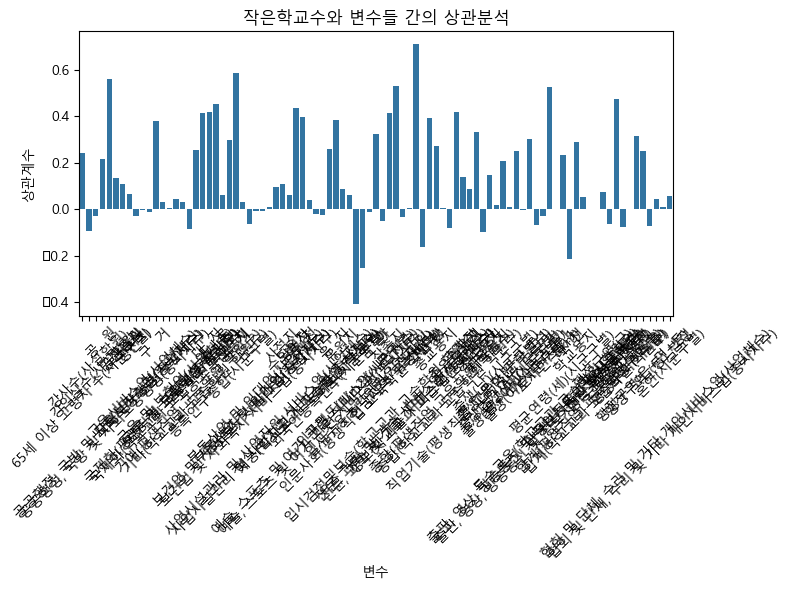

In [272]:
# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=corr_matrix_small_school.index, y=corr_matrix_small_school.values)
plt.title('작은학교수와 변수들 간의 상관분석')
plt.xlabel('변수')
plt.ylabel('상관계수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [273]:
corr_matrix_small_school

65세 이상 고령자 수(시군구별)               0.241437
강사수(사설학원)                       -0.092268
강의실수(사설학원)                      -0.026571
공  원                             0.218072
공공행정, 국방 및 사회보장행정(사업체수)          0.559111
                                   ...   
행정구역(읍+면+동)                      0.250700
행정구역_(동)_법정                     -0.071291
협회 및 단체, 수리 및 기타 개인서비스업(사업체수)    0.044866
협회 및 단체, 수리 및 기타 개인서비스업(종사자수)    0.008102
혼인(시군구별)                         0.056934
Length: 89, dtype: float64

## 4) 상관분석 수행 (연도별)
- target: 폐교 학교 수
- feature: 그외 모든 컬럼

In [274]:
category = '연도'
target = "폐교학교 수"
# 작은학교 수를 제외한 모든 컬럼
features = merged_corr_data_year.columns.difference([target,category])

# 상관분석 수행
corr_matrix_close_school = merged_corr_data_year[features].corrwith(merged_corr_data_year[target])

c:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


C:\Users\User\AppData\Local\Temp\ipykernel_12940\4182500153.py:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


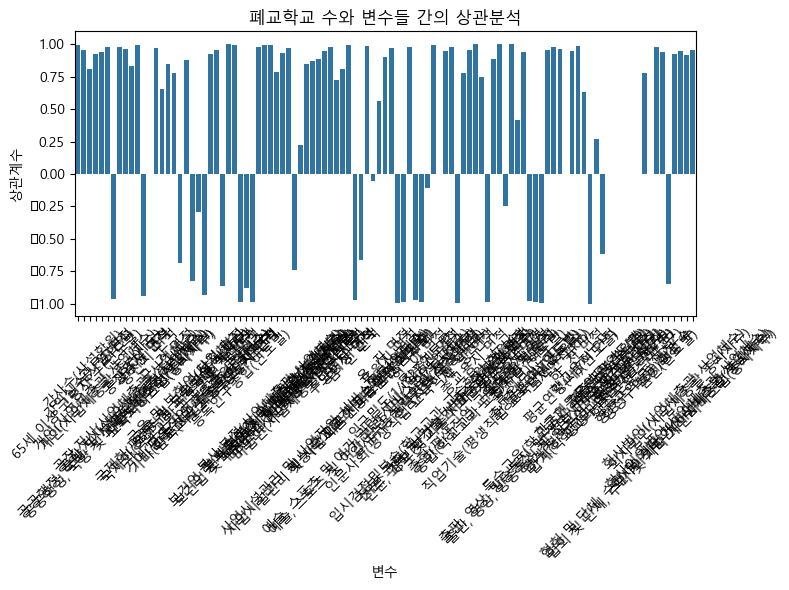

In [275]:
# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=corr_matrix_close_school.index, y=corr_matrix_close_school.values)
plt.title('폐교학교 수와 변수들 간의 상관분석')
plt.xlabel('변수')
plt.ylabel('상관계수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5) (의견) 컬럼이 너무 많아서 시각화하기 어려울 듯 함 > 


- 하지만 전부 한번씩은 확인해 봐야 비교도 하고 인사이트 도출하기 좋을거같음 

- 단 p-value > 0.05 이상인 것은 배제 

작은학교수 , 폐교학교 수 와 상관계수가 있는 컬럼들을 필터링 하고 그려서 시각화 해보자

### (1) 지역별 작은학교 수

In [276]:
def numerical_numerical(df, feature , target): # 숫자형 , 숫자형
    # 산점도 + 회귀분석 선 표기

    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    result = spst.pearsonr(df[feature], df[target])
    
    if result[1] >= 0.05:
        return 0
    else:
        sns.regplot(x=feature, y = target, data = df)
        plt.grid()
        plt.show()
        print(f'상관계수 : {result[0]}, p-value : {result[1]}')
        print('='*100)

In [277]:
# 전부다 보자 
high_corr = corr_matrix_small_school.index

# 결과 출력
high_corr

Index(['65세 이상 고령자 수(시군구별)', '강사수(사설학원)', '강의실수(사설학원)', '공  원',
       '공공행정, 국방 및 사회보장행정(사업체수)', '공공행정, 국방 및 사회보장행정(종사자수)', '공장용지', '과수원',
       '광천지', '교육서비스업(사업체수)', '교육서비스업(종사자수)', '구  거', '국제화(평생직업 교육학원 학원수)',
       '국제화(학교교과 교습학원 학원수)', '금융 및 보험업(사업체수)', '금융 및 보험업(종사자수)',
       '기예(평생직업 교육학원 학원수)', '기타(학교교과 교습학원 학원수)', '답지(쌀캐는 땅)', '대  지', '도  로',
       '등록인구총합(시군구별)', '목장용지', '묘  지', '보건업 및 사회복지 서비스업(사업체수)',
       '보건업 및 사회복지 서비스업(종사자수)', '부동산업 및 임대업(사업체수)', '부동산업 및 임대업(종사자수)',
       '사업시설관리 및 사업지원 서비스업(사업체수)', '사업시설관리 및 사업지원 서비스업(종사자수)', '사적지', '수도용지',
       '양어장', '염  전', '예능(학교교과 교습학원 학원수)', '예술, 스포츠 및 여가 관련 서비스업(사업체수)',
       '예술, 스포츠 및 여가 관련 서비스업(종사자수)', '외국인등록인구(시군구별)', '유  지', '유원지',
       '이혼(시군구별)', '인구밀도(1/m2)(시군구별)', '인문사회(평생직업 교육학원 학원수)', '일시수용능력인원(사설학원)',
       '임  야', '입시검정및보습(학교교과 교습학원 학원수)', '잡종지', '전남지역 구성비(%)',
       '전문, 과학 및 기술 서비스업(사업체수)', '전문, 과학 및 기술 서비스업(종사자수)', '전지(논)',
       '정보(학교교과 교습학원 학원수)', '제  방', '종교용지', '종합(평생직업 교육학원 학원수)',
       '종

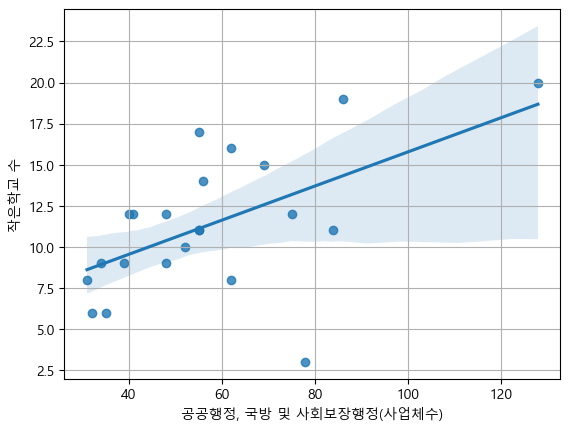

상관계수 : 0.5591107251042188, p-value : 0.006827763821666467


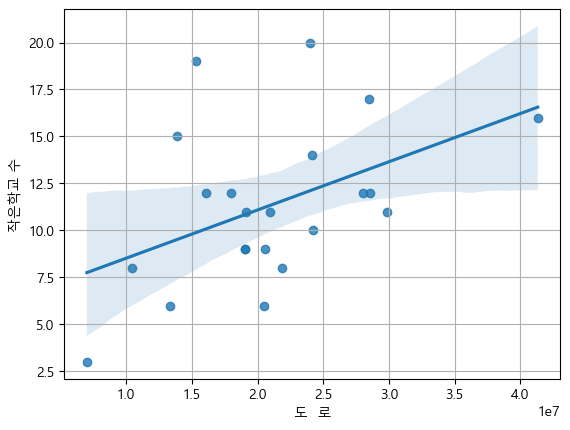

상관계수 : 0.45355434151129237, p-value : 0.03400014558961501


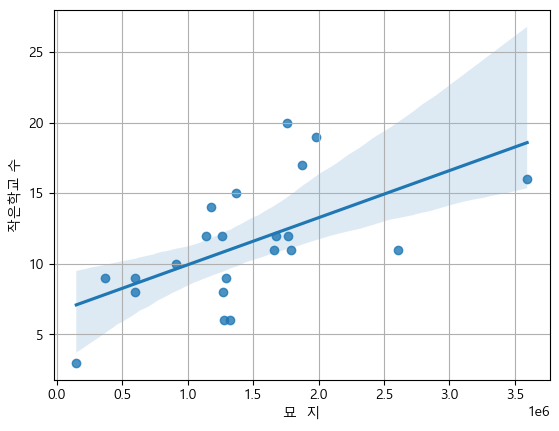

상관계수 : 0.587905547348663, p-value : 0.004008695190742829


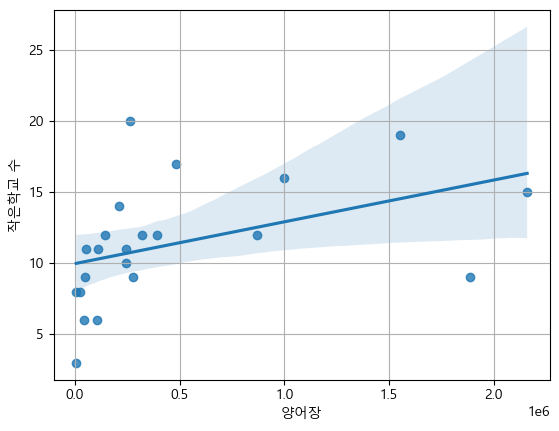

상관계수 : 0.4352241773560558, p-value : 0.04292681023162777


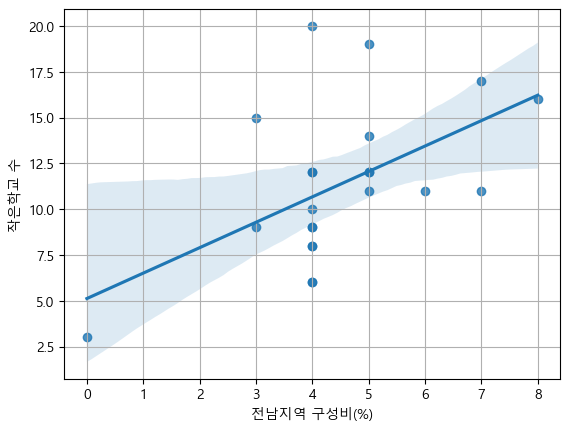

상관계수 : 0.5322567800621796, p-value : 0.010774856680062223


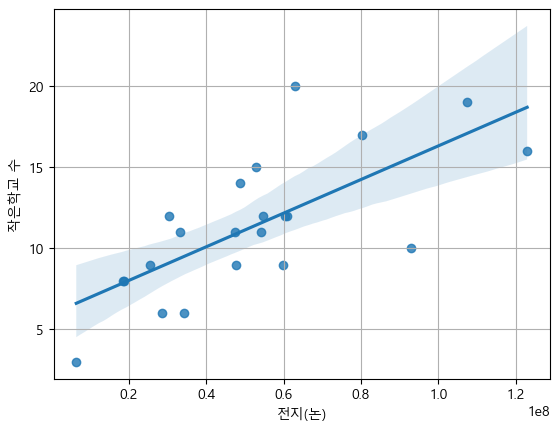

상관계수 : 0.7096248395287204, p-value : 0.00021666206752478327


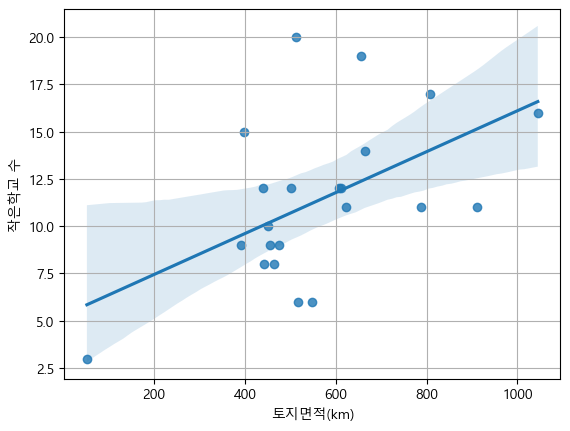

상관계수 : 0.5253359522096344, p-value : 0.01204931010347553


C:\Users\User\AppData\Local\Temp\ipykernel_12940\1061150101.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  result = spst.pearsonr(df[feature], df[target])
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


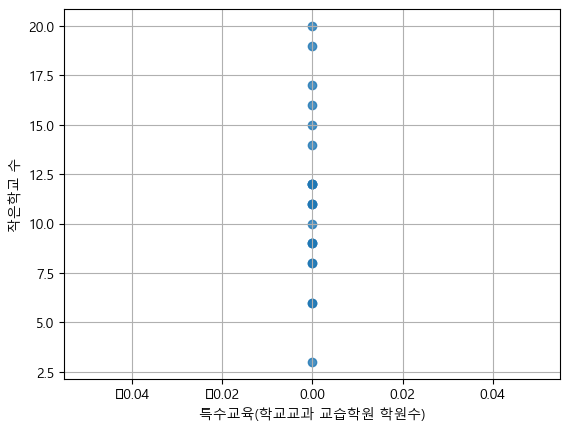

상관계수 : nan, p-value : nan


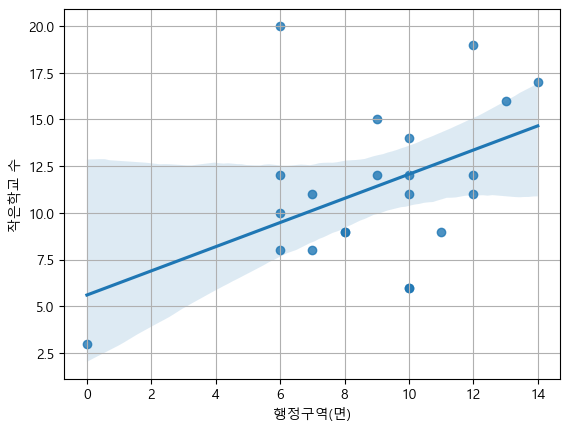

상관계수 : 0.4751505184624545, p-value : 0.025433993463430282


C:\Users\User\AppData\Local\Temp\ipykernel_12940\1061150101.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  result = spst.pearsonr(df[feature], df[target])


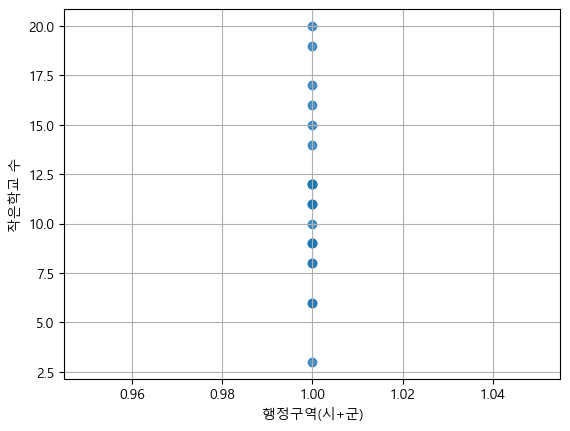

상관계수 : nan, p-value : nan


In [278]:
target = '작은학교 수'
for feature in high_corr:
    numerical_numerical(merged_corr_data_area, feature, target)

### (2) 연도별 폐교 학교 수

In [279]:
# 0.5 이상의 상관계수를 가진 index들만 필터링
high_corr = corr_matrix_close_school.index

# 결과 출력
high_corr



Index(['65세 이상 고령자 수(연도별)', '강사수(사설학원)', '강의실수(사설학원)', '개인(사업체총괄 사업체수)',
       '개인(사업체총괄 종사자수)', '공  원 면적', '공공행정, 국방 및 사회보장행정(사업체수)',
       '공공행정, 국방 및 사회보장행정(종사자수)', '공장,지사(사업체총괄 사업체수)', '공장,지사(사업체총괄 종사자수)',
       ...
       '행정구역 수(시+군)', '행정구역(동) 법정 수', '행정구역(동)행정 수',
       '협회 및 단체, 수리 및 기타 개인서비스업(사업체수)', '협회 및 단체, 수리 및 기타 개인서비스업(종사자수)',
       '혼인(연도별)', '회사법인(사업체총괄 사업체수)', '회사법인(사업체총괄 종사자수)', '회사이외법인(사업체총괄 사업체수)',
       '회사이외법인(사업체총괄 종사자수)'],
      dtype='object', length=103)

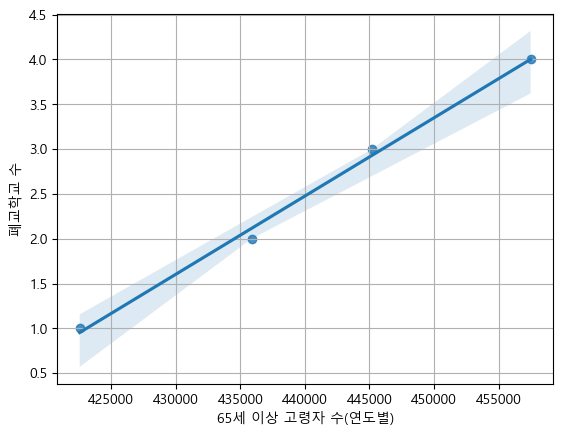

상관계수 : 0.9979251677057337, p-value : 0.0020748322942663044


c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


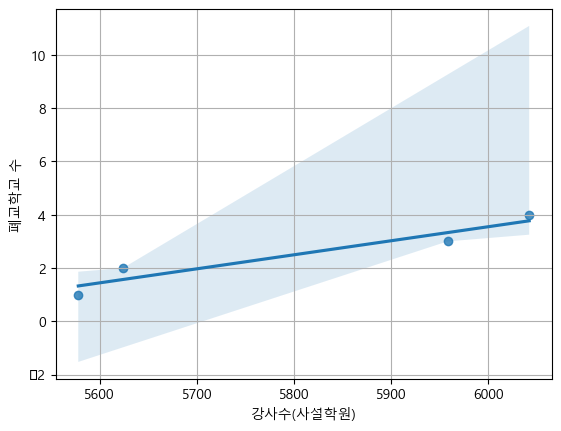

상관계수 : 0.953643558058785, p-value : 0.04635644194121502


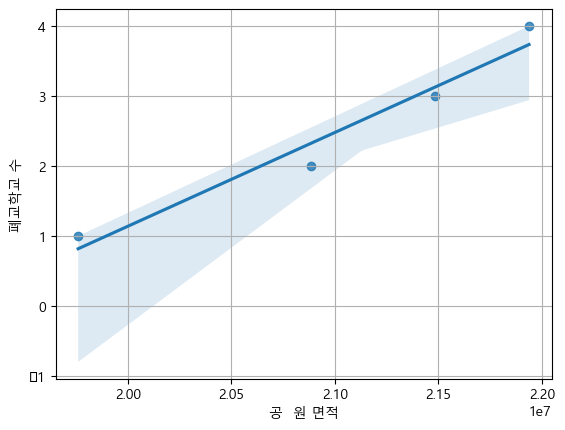

상관계수 : 0.9774433703337604, p-value : 0.022556629666239614


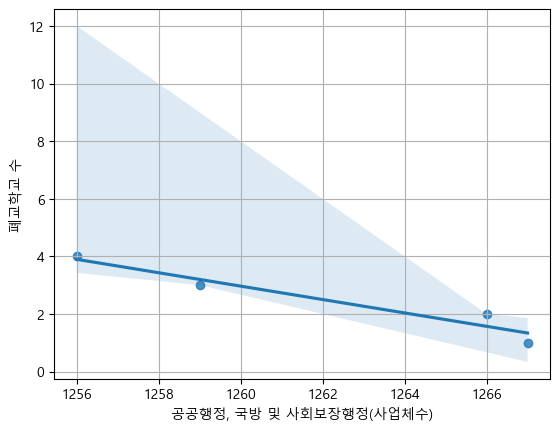

상관계수 : -0.9644856443408242, p-value : 0.035514355659175934


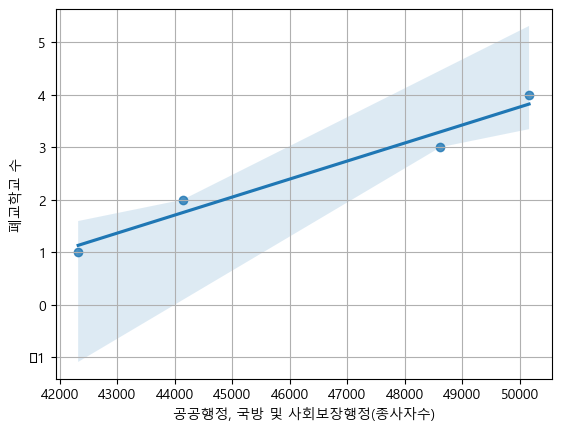

상관계수 : 0.9803391389625349, p-value : 0.019660861037465116


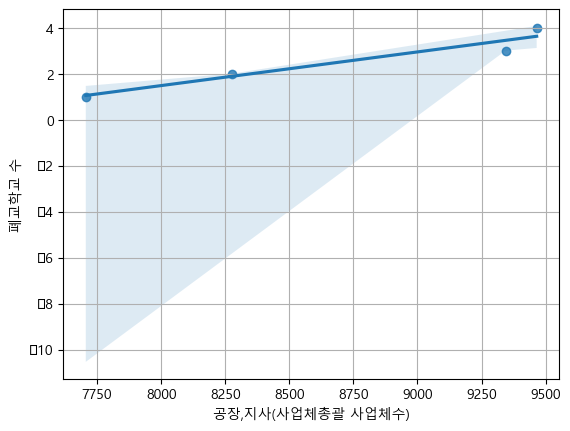

상관계수 : 0.9637038525857419, p-value : 0.03629614741425824


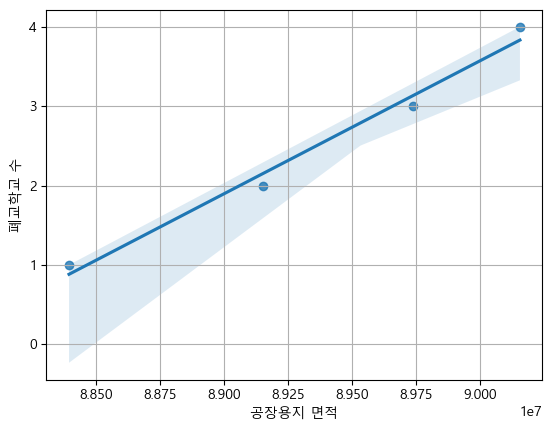

상관계수 : 0.9916581893341723, p-value : 0.008341810665827731


C:\Users\User\AppData\Local\Temp\ipykernel_12940\1061150101.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  result = spst.pearsonr(df[feature], df[target])


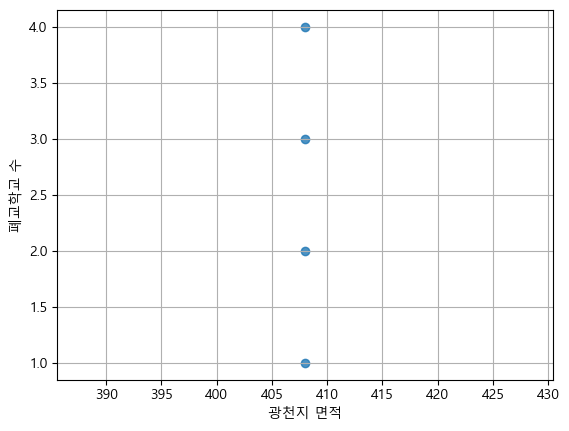

상관계수 : nan, p-value : nan


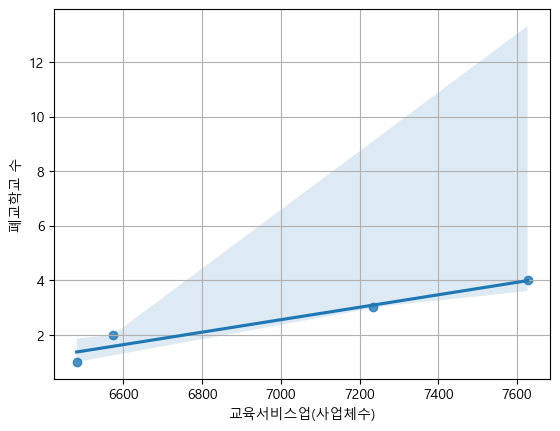

상관계수 : 0.9675830083184651, p-value : 0.03241699168153489


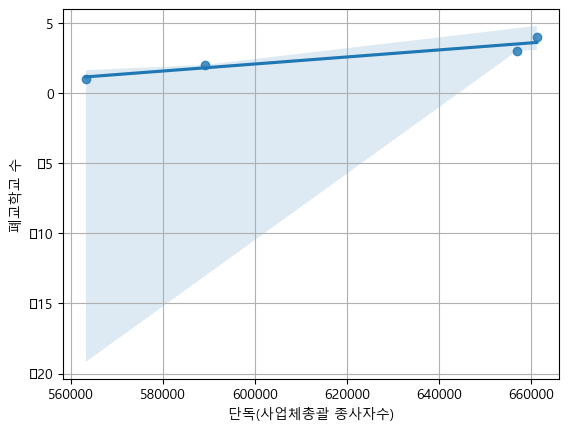

상관계수 : 0.9522038183685231, p-value : 0.04779618163147692


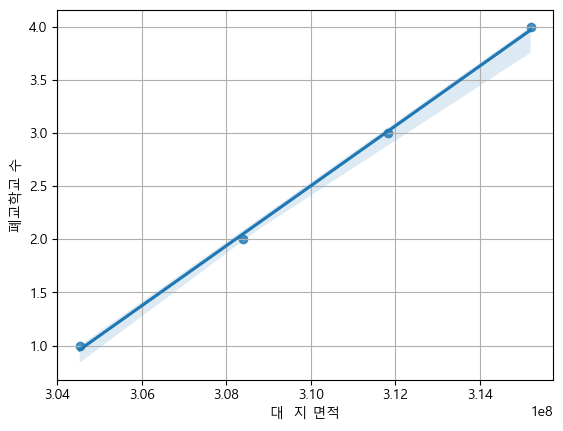

상관계수 : 0.9994379433063534, p-value : 0.0005620566936466176


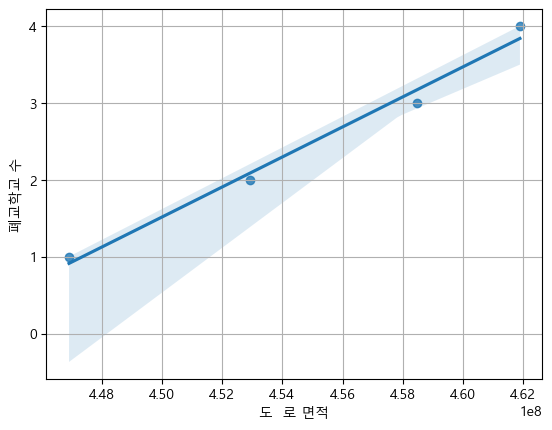

상관계수 : 0.9930378194460884, p-value : 0.006962180553911512


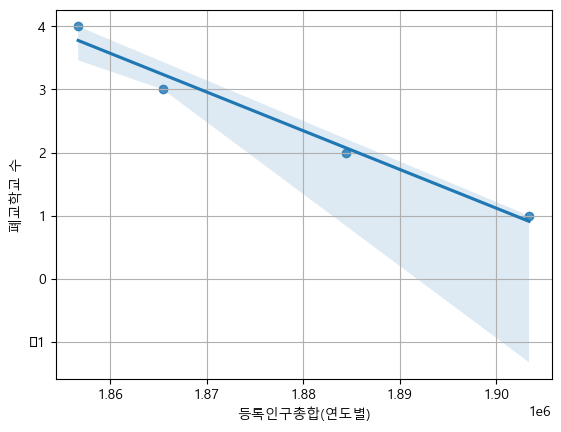

상관계수 : -0.9879455093259524, p-value : 0.012054490674047624


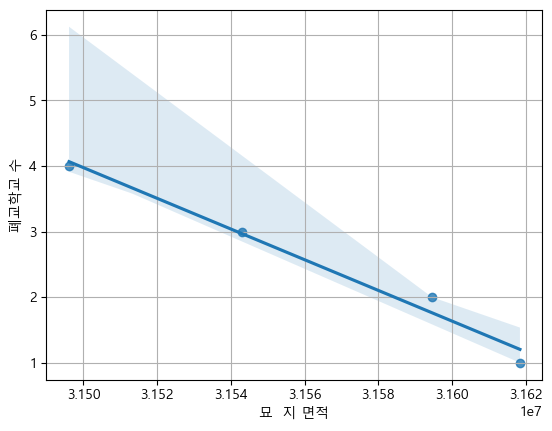

상관계수 : -0.989600893470555, p-value : 0.010399106529444868


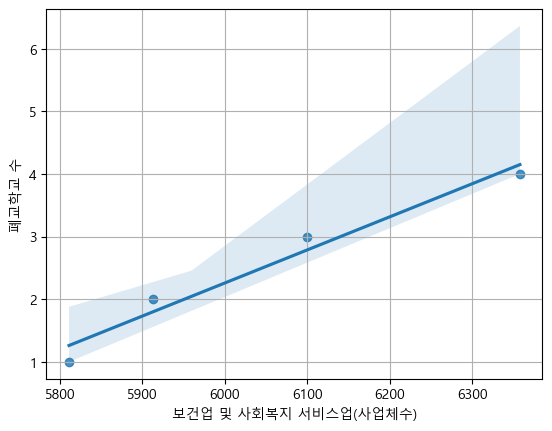

상관계수 : 0.9822478870589241, p-value : 0.017752112941075815


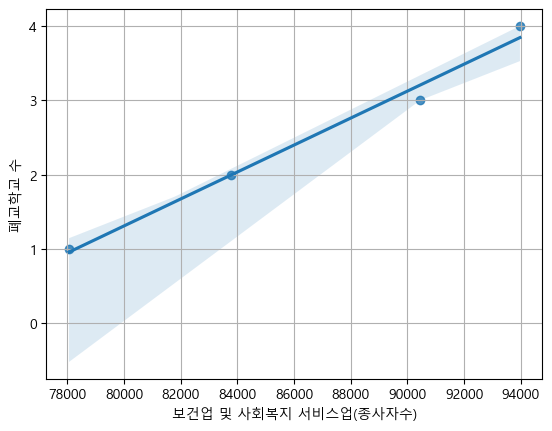

상관계수 : 0.993149793240971, p-value : 0.006850206759029032


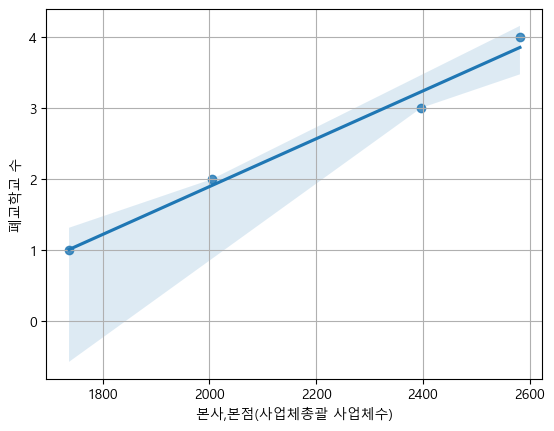

상관계수 : 0.9917001179027918, p-value : 0.008299882097208222


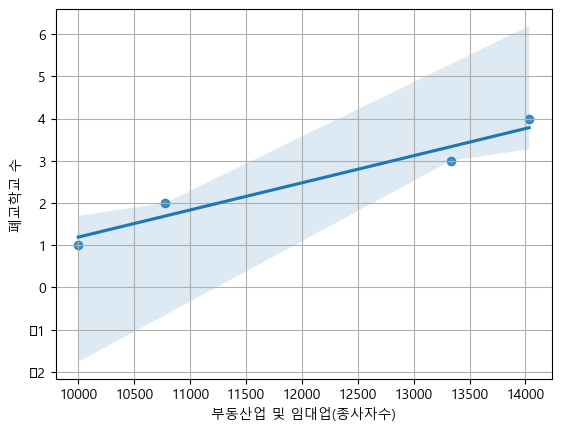

상관계수 : 0.9704946596307229, p-value : 0.0295053403692771


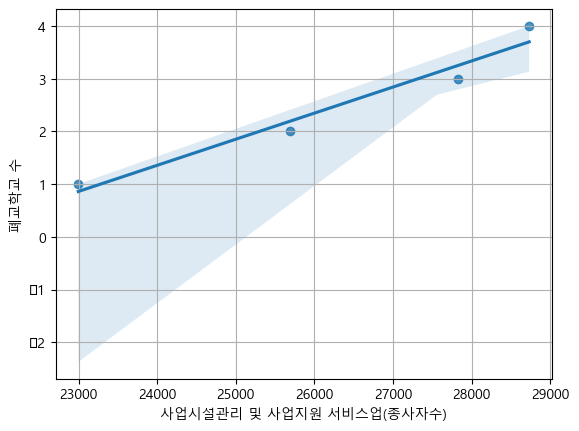

상관계수 : 0.9786604477056522, p-value : 0.021339552294347808


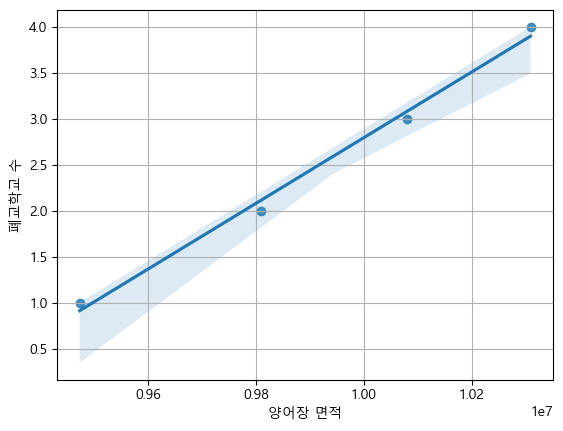

상관계수 : 0.9963230117772428, p-value : 0.0036769882227571937


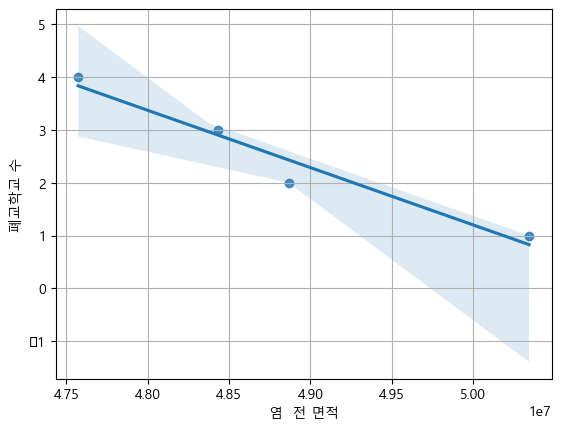

상관계수 : -0.9744344227811103, p-value : 0.025565577218889857


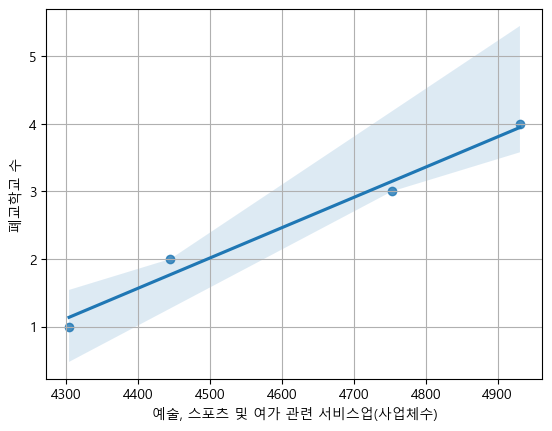

상관계수 : 0.9902266033075253, p-value : 0.009773396692474678


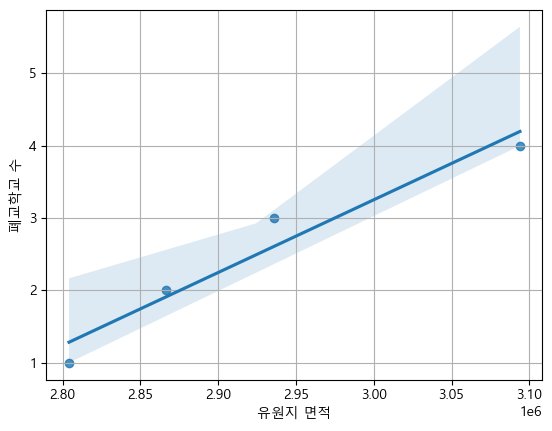

상관계수 : 0.9714880735403306, p-value : 0.02851192645966938


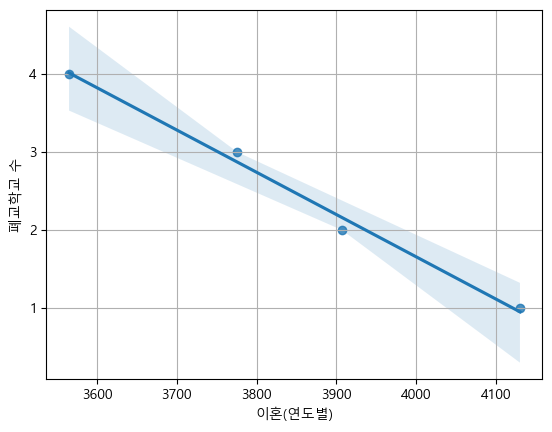

상관계수 : -0.9954864285699612, p-value : 0.004513571430038832


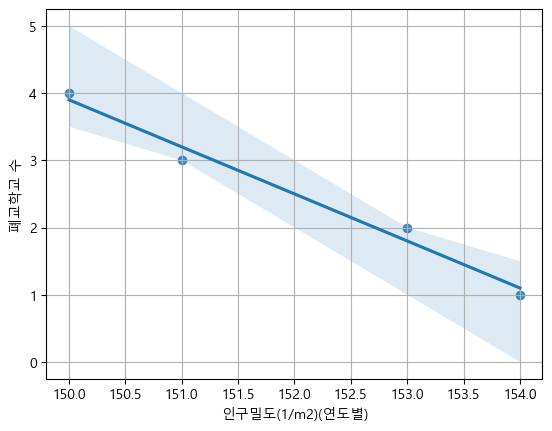

상관계수 : -0.9899494936611666, p-value : 0.01005050633883342


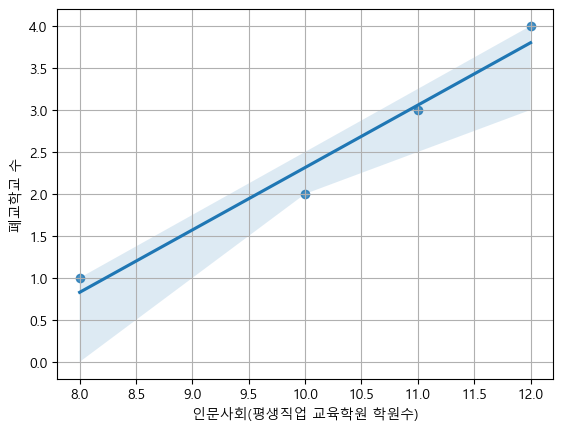

상관계수 : 0.9827076298239908, p-value : 0.017292370176009264


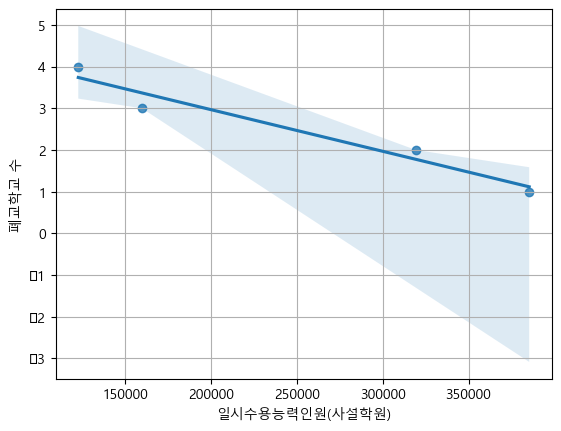

상관계수 : -0.9728302646913507, p-value : 0.0271697353086493


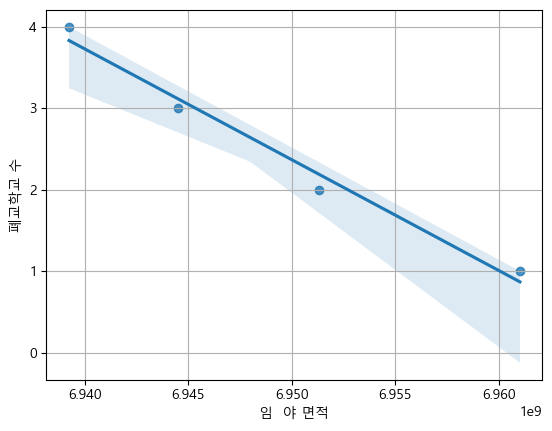

상관계수 : -0.9905623830506367, p-value : 0.009437616949363292


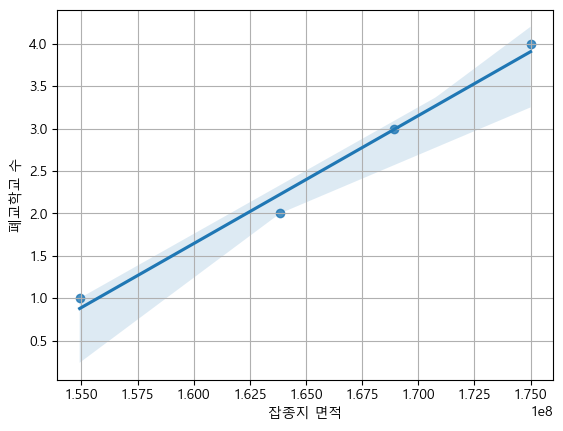

상관계수 : 0.9925997638098973, p-value : 0.00740023619010266


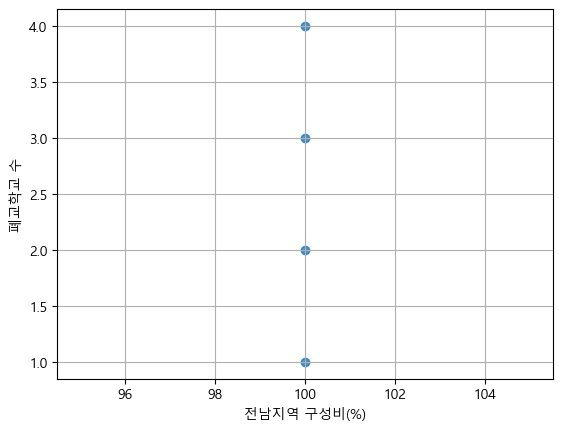

상관계수 : nan, p-value : nan


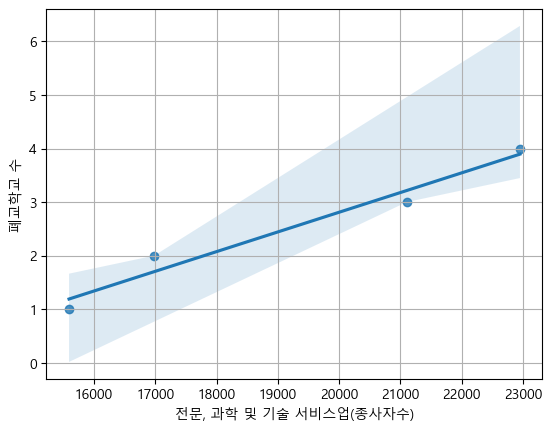

상관계수 : 0.9815177482942876, p-value : 0.018482251705712383


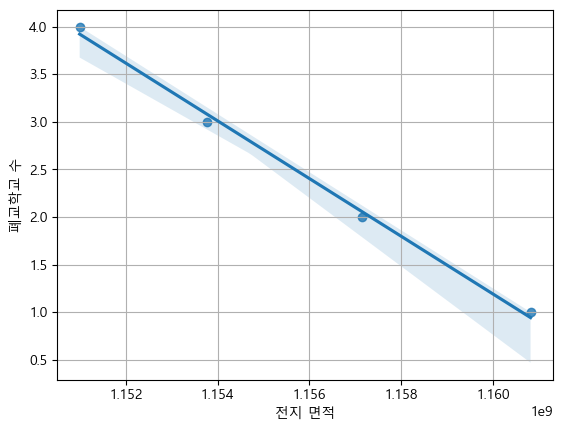

상관계수 : -0.9981326250685939, p-value : 0.0018673749314062071


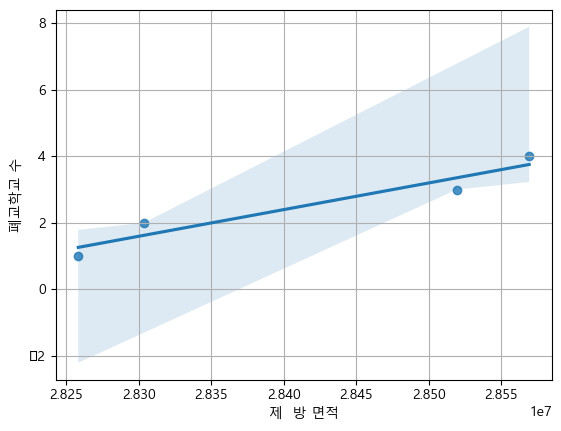

상관계수 : 0.9596540770533138, p-value : 0.04034592294668604


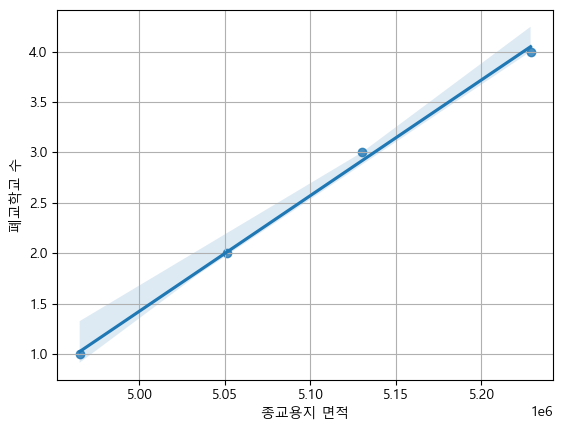

상관계수 : 0.9990126017476885, p-value : 0.0009873982523114222


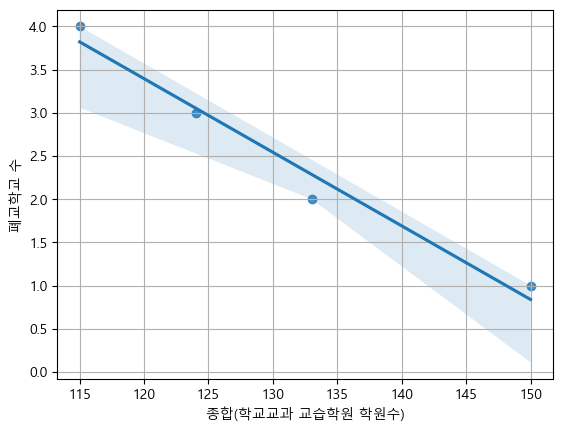

상관계수 : -0.9855457617130183, p-value : 0.014454238286981669


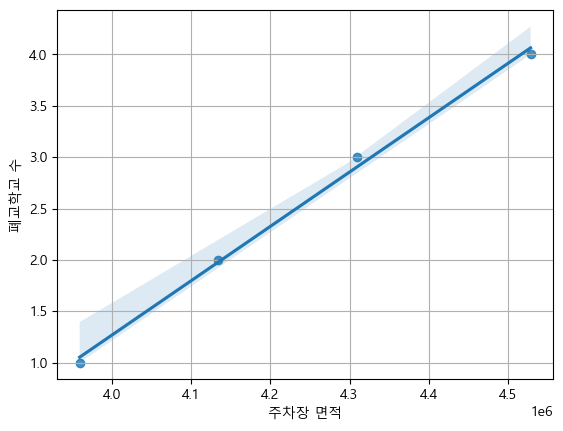

상관계수 : 0.9983938261053196, p-value : 0.0016061738946804294


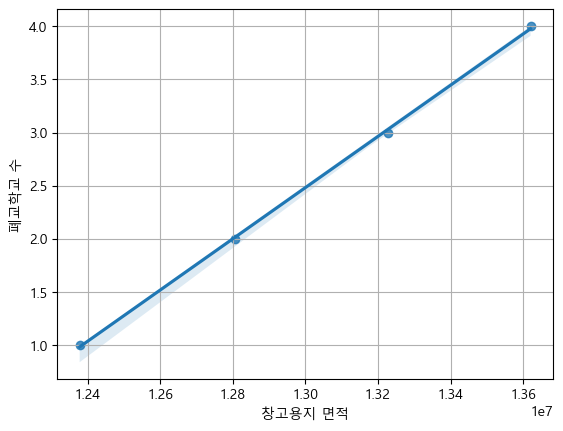

상관계수 : 0.9998149610159304, p-value : 0.00018503898406962982


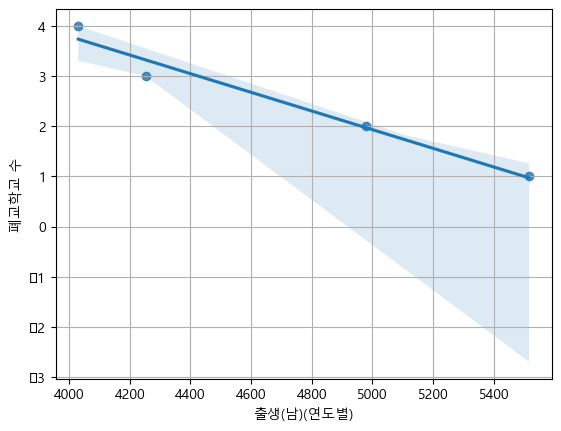

상관계수 : -0.9822611703740358, p-value : 0.01773882962596418


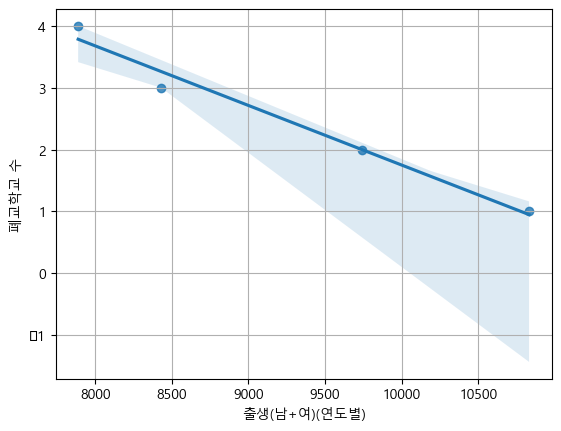

상관계수 : -0.9881355193786033, p-value : 0.011864480621396556


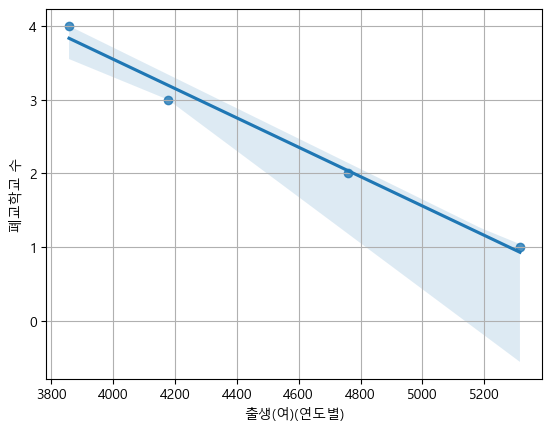

상관계수 : -0.9927340806180682, p-value : 0.0072659193819317736


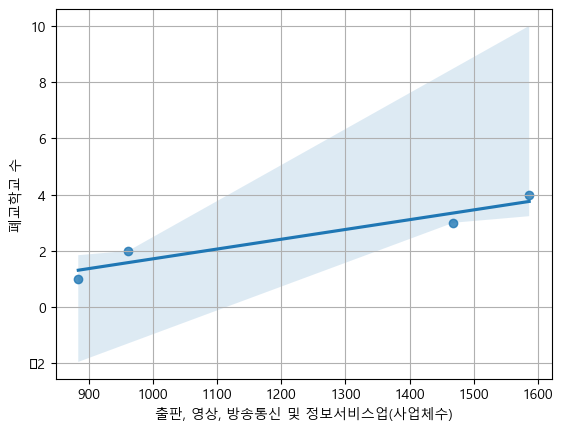

상관계수 : 0.9539965334520539, p-value : 0.04600346654794607


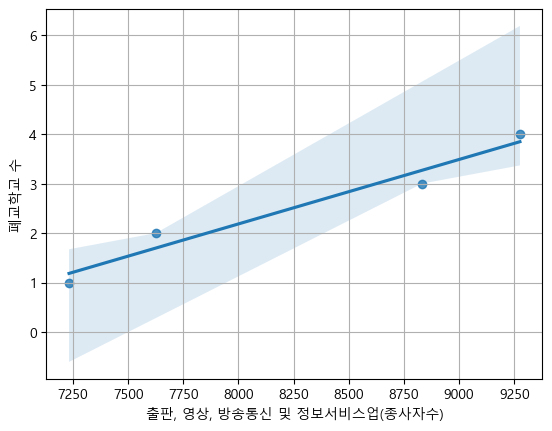

상관계수 : 0.9776510151630701, p-value : 0.02234898483692982


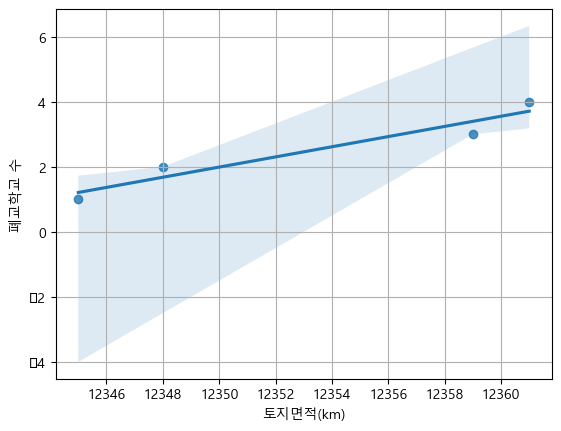

상관계수 : 0.9602703813499681, p-value : 0.039729618650031995


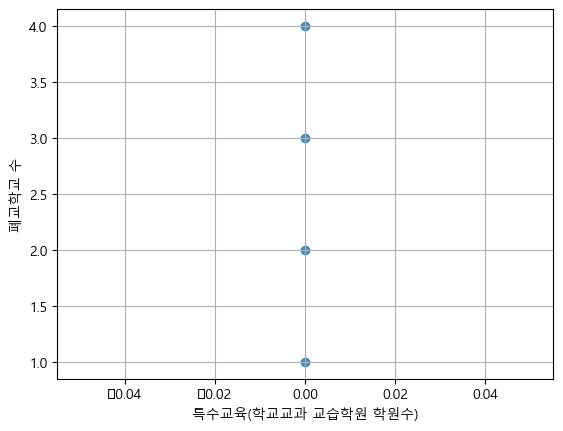

상관계수 : nan, p-value : nan


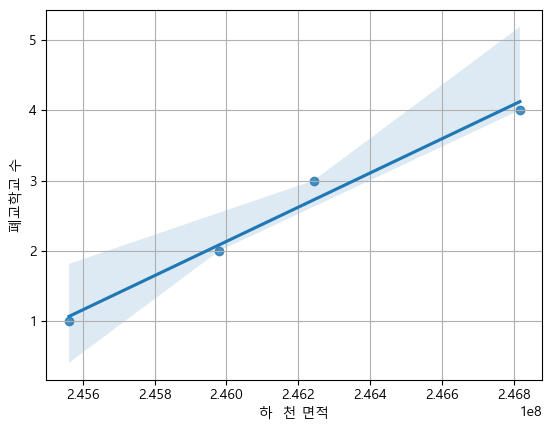

상관계수 : 0.9896763726358571, p-value : 0.01032362736414294


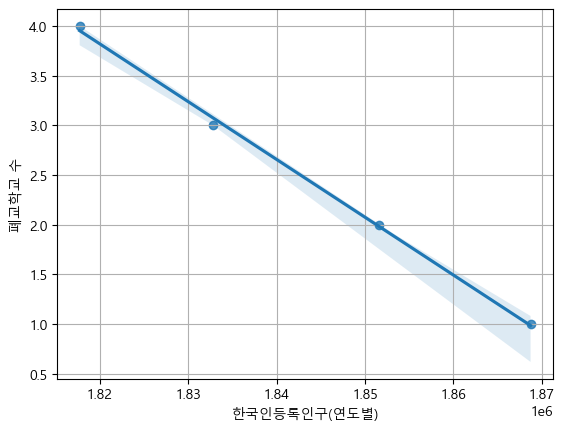

상관계수 : -0.9991755904912651, p-value : 0.000824409508734858


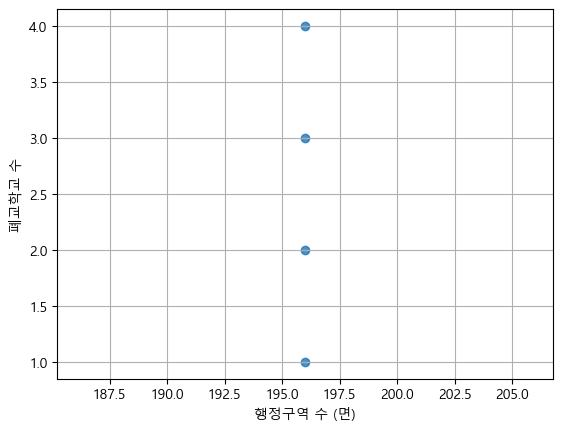

상관계수 : nan, p-value : nan


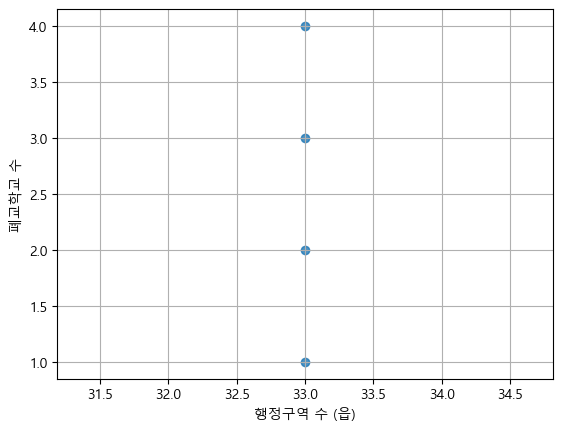

상관계수 : nan, p-value : nan


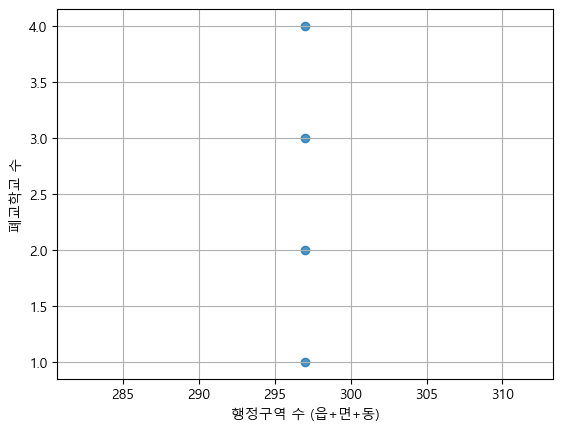

상관계수 : nan, p-value : nan


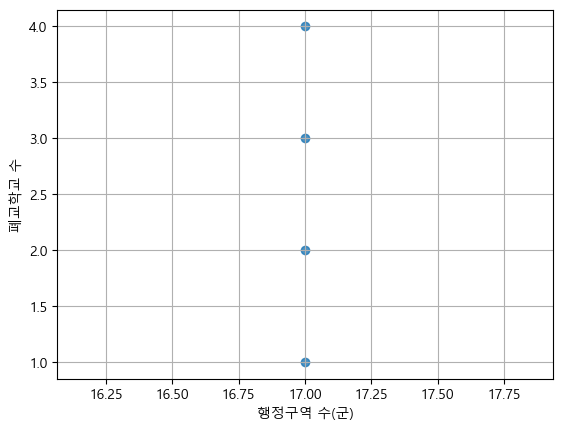

상관계수 : nan, p-value : nan


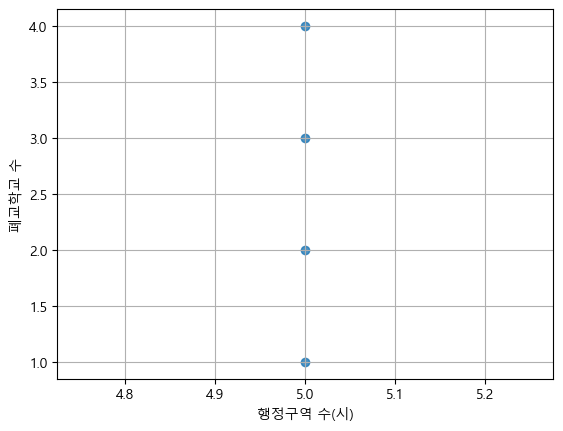

상관계수 : nan, p-value : nan


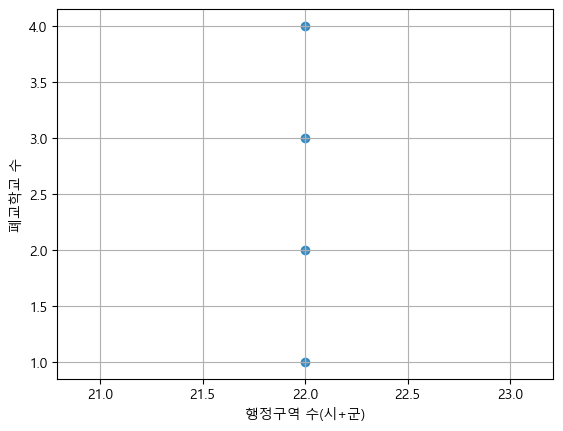

상관계수 : nan, p-value : nan


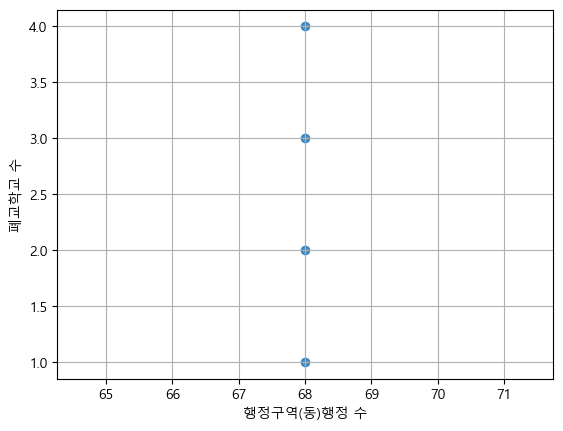

상관계수 : nan, p-value : nan


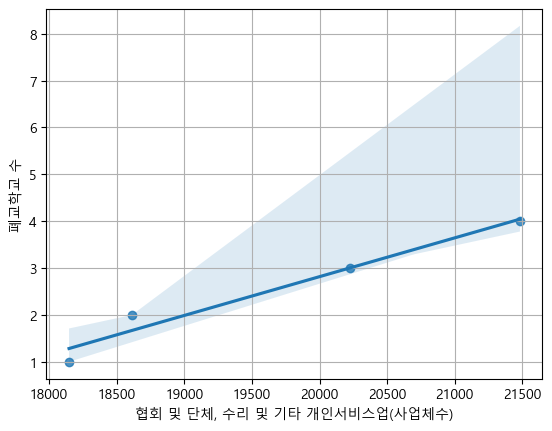

상관계수 : 0.9805914261555435, p-value : 0.01940857384445649


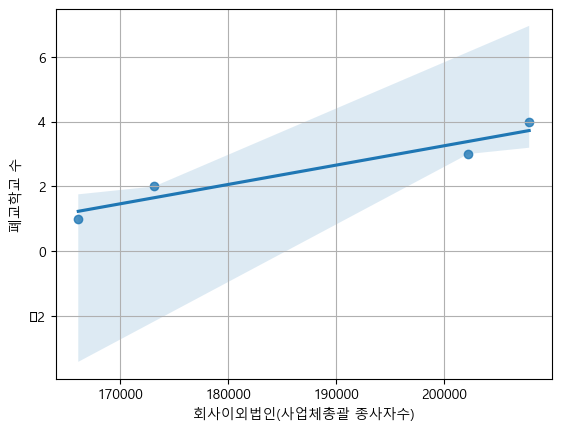

상관계수 : 0.9589769667474312, p-value : 0.04102303325256873


In [280]:
target = '폐교학교 수'
for feature in high_corr:
    numerical_numerical(merged_corr_data_year, feature, target)

# (참고용 함수들)

In [281]:
def categorical_numerical(df, feature, target) : # 범주형 , 숫자형 변수간 검정  (t-test, Anova) / 막대그래프 시각화 /

    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이###3333fafa333614d6a13터프레임의 컬럼명
    '''

    sns.barplot(x = feature, y = target, data = df)
    plt.grid()
    plt.show()

    an_list = []
    for i in range(df[feature].nunique()) :
        an_list.append(df.loc[df[feature] == i, target])

    if len(an_list) == 2:
    # t-test
        t_stat, p_value = spst.ttest_ind(an_list[0], an_list[1])
        print(f"T-test 결과: t-statistic = {t_stat}, p-value = {p_value}")

    elif len(an_list) > 2:
    # ANOVA
        f_stat, p_value = spst.f_oneway(*an_list)
        print(f"ANOVA 결과: F-statistic = {f_stat}, p-value = {p_value}")

    else:
        print("비교할 그룹이 부족합니다.")

def categorical_categorical(df , feature , target): # 범주형 --> 범주형 간 검정 (카이제곱검정) / 모자이크플롯
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    mosaic(df, [ feature,target])
    #plt.axhline(1- df[target].mean(), color = 'r')
    plt.grid()
    plt.show()

    # 먼저 집계
    table = pd.crosstab(df[target], df[feature])
    print('교차표\n', table)
    print('=' * 100)

    # 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('자유도', result[2])
    # print('기대빈도\n',result[3])



def numerical_numerical(df, feature , target): # 숫자형 , 숫자형
    # 산점도 + 회귀분석 선 표기

    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    sns.regplot(x=feature, y = target, data = df)
    plt.grid()
    plt.show()
    print('='*100)
    result = spst.pearsonr(df[feature], df[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')


def numerical_numerical_hitmap(df):
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    # 숫자형으로 구성된 데이터들 한해서만 상관분석 수행
    temp = df.select_dtypes(include=['number'])
    plt.figure(figsize = (8, 8))
    # 한글 폰트 설정: 맑은 고딕
    plt.rcParams['font.family'] = 'Malgun Gothic'
    # 유니코드 마이너스 사용 설정
    plt.rcParams['axes.unicode_minus'] = False
    sns.heatmap(temp.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.2f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
    plt.show()